# Revisions
**Author**: Andrea Cass

## 1. About this notebook
Based on advice during a meeting with my supervisor, several changes will be made and documented here. These include:
1. Ensuring both time periods have identical keywords 
2. Renaming my explanatory variable "time period" rather than "inflow"
3. Re-conducting the steps from Notebook 05  and 06 with the following addition:

    Adding the proportion of tweets that contain the word "Ukrainian(s)" or "Syrian(s)" to the descriptive statistics
    
4. Adding new regression models that analyze each time period separately

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import csv
import os
from pathlib import Path
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

In [2]:
# find current working directory

os.getcwd()

'/Users/andycass/Jupyterlab_main-folder/THESIS/limited collection/revised/negative binary class'

In [3]:
# changing current working directory

os.chdir('/Users/andycass/Desktop/Thesis_data-and-code')

In [4]:
# naming the current working directory

cwd = Path.cwd()

In [5]:
# naming the CASS_thesis folder

CASS_thesis = cwd / 'CASS_thesis'

In [6]:
# double-checking the CASS_thesis location

CASS_thesis

PosixPath('/Users/andycass/Desktop/Thesis_data-and-code/CASS_thesis')

In [7]:
df = pd.read_csv(CASS_thesis / '04_Prepared-data_limited_merged.csv', index_col=[0])

In [8]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...","['0.0679844', '0.88380396', '0.0482117', '']",0.067984,0.883804,0.048212,NEUTRAL,0
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66261,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,English,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0
66262,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1
66263,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0
66264,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,English,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1


In [9]:
# resetting index

df = df.reset_index(drop=True)

In [10]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...","['0.0679844', '0.88380396', '0.0482117', '']",0.067984,0.883804,0.048212,NEUTRAL,0
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38606,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,English,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0
38607,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1
38608,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0
38609,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,English,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38611 entries, 0 to 38610
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   text                             38611 non-null  object 
 1   author_id                        38611 non-null  float64
 2   created_at                       38611 non-null  object 
 3   lang                             38611 non-null  object 
 4   geo.place_id                     38225 non-null  object 
 5   public_metrics.retweet_count     38611 non-null  float64
 6   public_metrics.reply_count       38611 non-null  float64
 7   public_metrics.like_count        38611 non-null  float64
 8   public_metrics.quote_count       38611 non-null  float64
 9   public_metrics.impression_count  38611 non-null  float64
 10  geo.coordinates.coordinates      4347 non-null   object 
 11  in_reply_to_user_id              12325 non-null  float64
 12  entities.hashtags 

## 3. Keywords for first time period tweet collection

### 3.1. English

#### 3.1.1. Original English keywords:
* refugee
* refugees
* asylum seeker
* syrian
* syrians

#### 3.1.2. New English keywords
* refugee
* refugees
* asylum seeker

### 3.2. German

#### 3.2.1. Original German keywords
* flüchtling
* fluchtling
* fluechtling
* flüchtlinge
* fluchtlinge
* fluechtlinge
* asylbewerber
* asylbewerberin
* asylbewerberinnen
* asylsuchende
* asylsuchenden
* asylant
* asylantin
* asylanten
* asylantinnen
* syrer
* syrerin
* syrier
* syrierin
* syrisch

#### 3.2.2. New German keywords
* flüchtling
* fluchtling
* fluechtling
* flüchtlinge
* fluchtlinge
* fluechtlinge
* asylbewerber
* asylbewerberin
* asylbewerberinnen
* asylsuchende
* asylsuchenden
* asylant
* asylantin
* asylanten
* asylantinnen

## 4. Keywords for second time period tweet collection

### 4.1. English

#### 4.1.1. Original English keywords
* refugee
* refugees
* asylum seeker
* ukrainian
* ukrainians

#### 4.1.2. New English keywords
* refugee
* refugees
* asylum seeker

### 4.2. German

#### 4.2.1. Original German keywords
* flüchtling
* fluchtling
* fluechtling
* flüchtlinge
* fluchtlinge
* fluechtlinge
* asylbewerber
* asylbewerberin
* asylbewerberinnen
* asylsuchende
* asylsuchenden
* asylant
* asylantin
* asylanten
* asylantinnen
* ukrainer
* ukrainerin
* ukrainerinnen

#### 4.2.2. New German keywords
* flüchtling
* fluchtling
* fluechtling
* flüchtlinge
* fluchtlinge
* fluechtlinge
* asylbewerber
* asylbewerberin
* asylbewerberinnen
* asylsuchende
* asylsuchenden
* asylant
* asylantin
* asylanten
* asylantinnen

In [12]:
# defining the new English keywords

keywords_eng = ["refugee", "refugees", "asylum seeker"]

keywords_de = ["flüchtling", "fluchtling", "fluechtling", "flüchtlinge", "fluchtlinge", "fluechtlinge", "asylbewerber", "asylbewerberin", "asylbewerberinnen", "asylsuchende", "asylsuchenden", "asylant", "asylantin", "asylanten", "asylantinnen"]
               

In [13]:
# converting the keyword lists to sets

keywords_eng_set = set(keywords_eng)
keywords_de_set = set(keywords_de)

In [14]:
# combining English and German keyword sets

keywords = keywords_eng_set.union(keywords_de_set)

In [15]:
# filter the tweets using the combined keywords

mask = df['text'].str.contains('|'.join(keywords), case=False)

In [16]:
# Create a sub-dataframe with the filtered tweets
sub_df = df[mask]

In [17]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1
5,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,@user @user Aber Hauptsache es kommen keine Fl...,"['0.54107517', '0.37931463', '0.07961021']",0.541075,0.379315,0.079610,NEGATIVE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38606,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,English,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0
38607,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1
38608,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0
38609,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,English,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1


In [18]:
# resetting index

sub_df = sub_df.reset_index(drop=True)

In [19]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Language,date,inflow,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,German,2016-04-20 00:00:00+00:00,Syrians,@user @user Aber Hauptsache es kommen keine Fl...,"['0.54107517', '0.37931463', '0.07961021']",0.541075,0.379315,0.079610,NEGATIVE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,English,2021-06-28 00:00:00+00:00,Ukrainians,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0
26719,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1
26720,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,English,2021-06-27 00:00:00+00:00,Ukrainians,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0
26721,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,English,2021-06-26 00:00:00+00:00,Ukrainians,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1


The original dataframe contained 38611 tweets, and the new dataframe contains 26723 tweets.

In [20]:
print(38611-26723)

11888


11888 tweets contained at least one of the original keywords but NOT at least one of the new keywords. In other words, some of the tweets referred specifically to Ukrainians or Syrians but not specifically to refugees or asylum seekers.

In [21]:
# doing a quick check to see how many tweets contain each of the keywords

# create a dictionary with all keywords and set count to zero (to ensure if there are no tweets with a certain keyword, this is displayed)
keyword_counts = {keyword: 0 for keyword in keywords}

# calculating the number of tweets containing each keyword
keyword_counts = {}
for keyword in keywords:
    count = sub_df['text'].str.contains(keyword, case=False).sum()
    keyword_counts[keyword] = count

# printing the number of tweets containing each keyword
for keyword, count in keyword_counts.items():
    print(f"Number of tweets containing the keyword '{keyword}': {count}")

Number of tweets containing the keyword 'fluchtling': 10
Number of tweets containing the keyword 'fluchtlinge': 8
Number of tweets containing the keyword 'fluechtlinge': 1556
Number of tweets containing the keyword 'asylbewerber': 836
Number of tweets containing the keyword 'refugees': 5601
Number of tweets containing the keyword 'asylbewerberinnen': 14
Number of tweets containing the keyword 'asylsuchenden': 68
Number of tweets containing the keyword 'asylantinnen': 2
Number of tweets containing the keyword 'fluechtling': 1619
Number of tweets containing the keyword 'asylanten': 742
Number of tweets containing the keyword 'flüchtlinge': 15302
Number of tweets containing the keyword 'flüchtling': 16952
Number of tweets containing the keyword 'asylsuchende': 277
Number of tweets containing the keyword 'asylant': 889
Number of tweets containing the keyword 'asylantin': 12
Number of tweets containing the keyword 'refugee': 7287
Number of tweets containing the keyword 'asylum seeker': 84
N

There is at least one tweet for every keyword.

In [22]:
# checking language counts

sub_df.Language.value_counts()

German     20226
English     6497
Name: Language, dtype: int64

Now that the dataset has been adjusted according to the new keyword requirement, the analysis can be re-conducted. First, the new dataset will be saved.

In [23]:
sub_df.to_csv(CASS_thesis / "07_Revisions.csv")

## 5. Renaming explanatory variable
My main explanatory variable, originally called "inflow" (and "inflow_Ukrainian" when converted to a dummy) will now be renamed "time_frame".

In [24]:
# renaming the 'inflow' column to 'time_frame'

sub_df = sub_df.rename(columns={'inflow': 'time_frame'})

In [25]:
# renaming the values in the 'time_frame' column
sub_df['time_frame'] = sub_df['time_frame'].replace({'Syrians': 'time frame 1', 'Ukrainians': 'time frame 2'})

In [26]:
sub_df["time_frame"]

0        time frame 1
1        time frame 1
2        time frame 1
3        time frame 1
4        time frame 1
             ...     
26718    time frame 2
26719    time frame 2
26720    time frame 2
26721    time frame 2
26722    time frame 2
Name: time_frame, Length: 26723, dtype: object

In [27]:
# checking language counts by time frame

bytf = sub_df.groupby('time_frame').Language.value_counts()
bytf

time_frame    Language
time frame 1  German      17522
              English      4250
time frame 2  German       2704
              English      2247
Name: Language, dtype: int64

## 6. Exploring with categorical CLASS (Negative, Neutral, Positive)
In this section, the dataset will be explored with CLASS as it currently is, a 3-part categorical variable inidcating whether a tweet is Negative, Neutral, or Positive.

### 6.1. Exploring CLASS
#### 6.1.1. Exploring CLASS for entire dataset

In [28]:
# getting the unique value counts of CLASS (absolute frequency)

sub_df['CLASS'].value_counts()

NEUTRAL     13593
NEGATIVE    10654
POSITIVE     2476
Name: CLASS, dtype: int64

In [29]:
# getting the relative frequencies of CLASS

sub_df['CLASS'].value_counts(normalize=True)

NEUTRAL     0.508663
NEGATIVE    0.398683
POSITIVE    0.092654
Name: CLASS, dtype: float64

<AxesSubplot: ylabel='CLASS'>

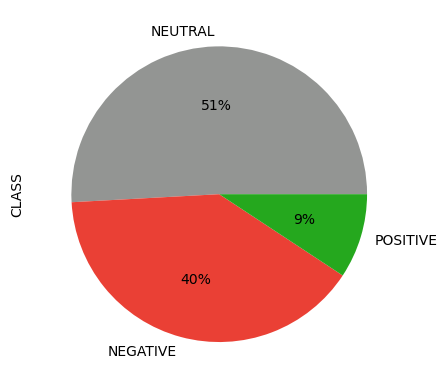

In [30]:
# pie chart

# first color: greyish hex code
# second color : redish hex code
# third color: greenish hex code

colors = '#939593', '#EA4035', '#25A81E'

# adding percentages

sub_df.CLASS.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=colors)

#### Remarks
We can see that most tweets were either neutral (52%) or negative (39%). Only about 9% of tweets were positive.

#### 6.1.2. Exploring CLASS by inflow

In [31]:
# getting the unique value counts of time frame (absolute frequency)

sub_df['time_frame'].value_counts()

time frame 1    21772
time frame 2     4951
Name: time_frame, dtype: int64

In [32]:
# getting the relative frequencies of time frame

sub_df['time_frame'].value_counts(normalize=True)

time frame 1    0.814729
time frame 2    0.185271
Name: time_frame, dtype: float64

In [33]:
# finding the proportion of classes by time frame

byinflow = sub_df.groupby('time_frame').CLASS.value_counts(normalize=True)
byinflow

time_frame    CLASS   
time frame 1  NEUTRAL     0.544966
              NEGATIVE    0.367353
              POSITIVE    0.087681
time frame 2  NEGATIVE    0.536457
              NEUTRAL     0.349020
              POSITIVE    0.114522
Name: CLASS, dtype: float64

#### Remarks
For time frame 1, most (~ 54.5%) tweets were neutral. Over a third (~ 36.7%) were negative, and only about 8.8% were positive.

For time frame 2, most (~ 50.4%) were negative. Over a third (~ 34.9%) were neutral, and only about 11.4% were positive.

### 6.2. Exploring by date
#### 6.2.1. Moving Average Sentiment

In [34]:
sub_df['year-month'].value_counts()

2015-09    4394
2015-10    2517
2015-11    2286
2016-01    2094
2015-08    1947
2016-02    1942
2016-03    1501
2015-12    1500
2022-03    1364
2015-07     792
2016-04     645
2015-04     464
2015-06     462
2022-04     398
2015-05     367
2022-10     355
2022-09     340
2022-05     316
2022-06     305
2015-01     291
2021-08     281
2021-11     271
2015-02     258
2022-08     255
2022-02     224
2022-07     217
2015-03     210
2021-10     159
2021-09     126
2021-12     104
2014-12     102
2021-07      99
2022-01      96
2021-06      41
Name: year-month, dtype: int64

In [35]:
# making new date_time variable

sub_df["date_time"] = pd.to_datetime(sub_df["created_at"], format = '%Y-%m-%d')

In [36]:
# getting rid of timezone

sub_df['date_time'] = sub_df['date_time'].apply(lambda x: x.replace(tzinfo=None))

In [37]:
# creating Moving Averages of num_CLASS

# creating Moving Averages for 'time frame 1'
time_frame1 = sub_df[sub_df['time_frame'] == 'time frame 1'][['date_time', 'num_CLASS']]
time_frame1 = time_frame1.sort_values(by='date_time', ascending=True)
time_frame1['Moving Average Sentiment'] = time_frame1['num_CLASS'].rolling(20, min_periods=3).mean()

# creating Moving Averages for 'time frame 2'
time_frame2 = sub_df[sub_df['time_frame'] == 'time frame 2'][['date_time', 'num_CLASS']]
time_frame2 = time_frame2.sort_values(by='date_time', ascending=True)
time_frame2['Moving Average Sentiment'] = time_frame2['num_CLASS'].rolling(20, min_periods=3).mean()

In [38]:
# finding monthly average sentiment

df.groupby('year-month').num_CLASS.mean()

year-month
2014-12   -0.319328
2015-01   -0.380531
2015-02   -0.257840
2015-03   -0.212245
2015-04   -0.303263
2015-05   -0.246914
2015-06   -0.251923
2015-07   -0.295662
2015-08   -0.318556
2015-09   -0.228763
2015-10   -0.263549
2015-11   -0.292739
2015-12   -0.209154
2016-01   -0.348315
2016-02   -0.321155
2016-03   -0.276869
2016-04   -0.294278
2021-06   -0.617021
2021-07   -0.546875
2021-08   -0.608280
2021-09   -0.442424
2021-10   -0.500000
2021-11   -0.583082
2021-12   -0.394904
2022-01   -0.615063
2022-02   -0.462039
2022-03   -0.401797
2022-04   -0.504425
2022-05   -0.491779
2022-06   -0.495108
2022-07   -0.527473
2022-08   -0.556886
2022-09   -0.557610
2022-10   -0.613216
Name: num_CLASS, dtype: float64

In [39]:
# changing the plot style to be colorblind friendly

plt.style.use('tableau-colorblind10')

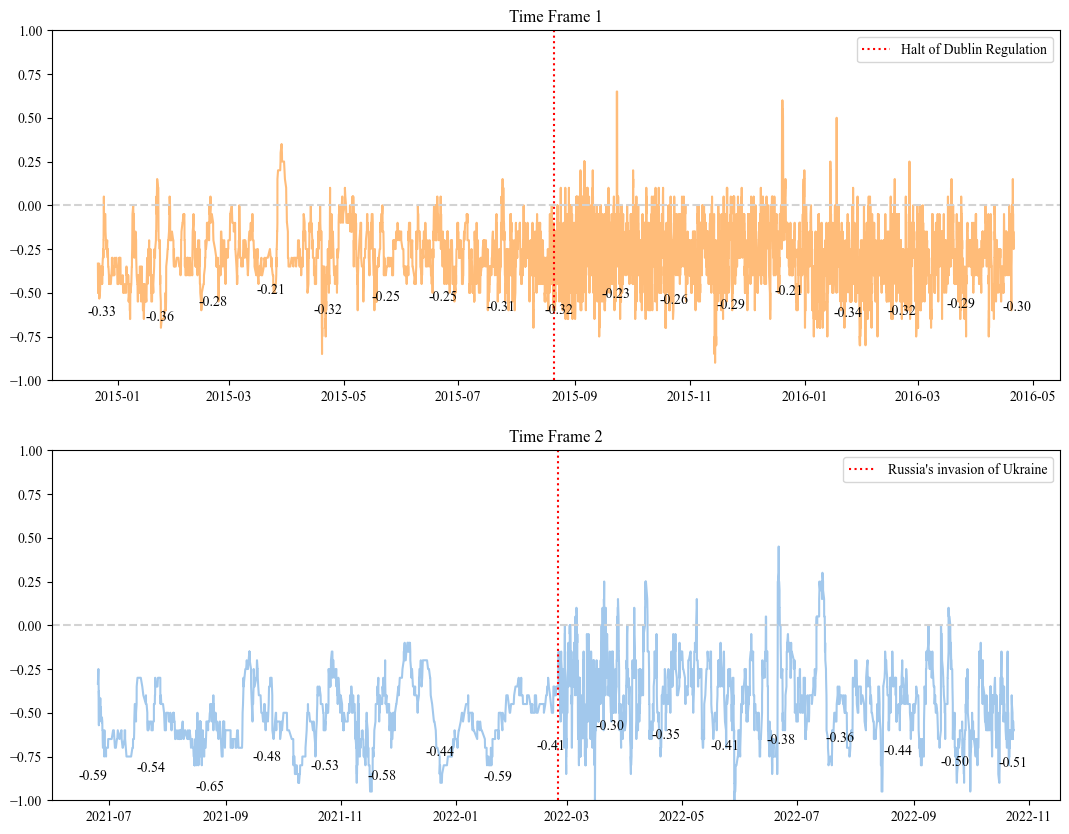

In [240]:
# plotting Moving Averages for each inflow using colorblind-friendly colors & Times New Roman

csfont = {'fontname': 'Times New Roman'}

fig, axes = plt.subplots(2, 1, figsize=(13, 10))
custom_ylim = (-1, 1)

plt.setp(axes, ylim=custom_ylim)

axes[0].plot(time_frame1['date_time'], time_frame1['Moving Average Sentiment'], color='#FFBC79')
axes[0].set_title("\n".join(['Time Frame 1']), **csfont)
axes[0].axhline(0, color='lightgrey', ls='--')

# vertical line (center time point)
ax_vline = axes[0].axvline(datetime(2015, 8, 21), color='red', ls='dotted', label='Halt of Dublin Regulation')
leg = axes[0].legend(handles=[ax_vline])

# set font for the legend text
for text in leg.get_texts():
    text.set_fontname('Times New Roman')

# set font for tick labels
for tick in axes[0].get_xticklabels() + axes[0].get_yticklabels():
    tick.set_fontname('Times New Roman')

# text annotations for average monthly sentiment
time_frame1_avg = time_frame1.groupby(pd.Grouper(key='date_time', freq='M'))['Moving Average Sentiment'].mean()
for i, v in time_frame1_avg.items():
    axes[0].annotate(f'{v:.2f}', xy=(i, v), xytext=(-10, -30), textcoords='offset points', fontsize=10,
                     ha='center', va='top', **csfont)

axes[1].plot(time_frame2['date_time'], time_frame2['Moving Average Sentiment'], color='#A2C8EC')
axes[1].set_title("\n".join(['Time Frame 2']), **csfont)
axes[1].axhline(0, color='lightgrey', ls='--')

# vertical line (center time point)
ax_vline = axes[1].axvline(datetime(2022, 2, 24), color='red', ls='dotted', label="Russia's invasion of Ukraine")
leg = axes[1].legend(handles=[ax_vline])

# set font for the legend text
for text in leg.get_texts():
    text.set_fontname('Times New Roman')

# set font for tick labels
for tick in axes[1].get_xticklabels() + axes[1].get_yticklabels():
    tick.set_fontname('Times New Roman')

# text annotations for average monthly sentiment
time_frame2_avg = time_frame2.groupby(pd.Grouper(key='date_time', freq='M'))['Moving Average Sentiment'].mean()
for i, v in time_frame2_avg.items():
    axes[1].annotate(f'{v:.2f}', xy=(i, v), xytext=(-10, -30), textcoords='offset points', fontsize=10,
                     ha='center', va='top', **csfont)

plt.savefig('10-Tweet_Moving-Avg_colorblind.png', bbox_inches='tight', dpi=200)
plt.show()

#### 6.2.2. Before or during inflow?
I want to create a variable indicating whether tweets were published during the major inflow of refugees (after the center point of each time frame) or before
* during syrian inflow: from 2015-08-21 onwards 
* before syrian inflow: before 2015-08-21

* during ukrainian inflow: from 2022-02-24 onwards
* before ukrainian inflow: before 2022-02-24 (but after April 21, 2016)

In [241]:
# creating time frame 1 and time frame 2 datasets

sub_df_t1 = sub_df[sub_df.time_frame=='time frame 1'].copy()
sub_df_t2 = sub_df[sub_df.time_frame=='time frame 2'].copy()

#### 6.2.2.1. *Before inflow*

In [242]:
# assigning True to all tweets before syrian inflow

sub_df['before_syrian_inflow'] = sub_df['date_time'] < '2015-08-21'

In [243]:
sub_df['before_syrian_inflow'].value_counts()

False    22896
True      3827
Name: before_syrian_inflow, dtype: int64

In [244]:
# assigning True to all tweets before ukrainian inflow 

sub_df['before_ukrainian_inflow'] = (sub_df['date_time'] < '2022-02-24') & (sub_df['time_frame']=='time frame 2')


In [245]:
sub_df['before_ukrainian_inflow'].value_counts()

False    25484
True      1239
Name: before_ukrainian_inflow, dtype: int64

In [246]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,new text,scores,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,"Habe schon lang nicht gehört, daß Flüchtling G...","['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,"""Es kommen kaum noch Flüchtlinge nach Griechen...","['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,@user @user Aber Hauptsache es kommen keine Fl...,"['0.54107517', '0.37931463', '0.07961021']",0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,"For day 1 of week 2, @user discusses the Socia...","['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True
26719,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,"@user Europe is racist, but in a different way...","['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True
26720,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,"A labour of love, inspired by Middle-earth.\n\...","['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True
26721,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,@user I must have missed the great flight of t...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True


In [247]:
# creating 'before_inflow'

sub_df['before_inflow'] = (sub_df['before_syrian_inflow']==True) | (sub_df['before_ukrainian_inflow']==True)

In [248]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,scores,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,"['0.3660313', '0.5833739', '0.05059479']",0.366031,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,"['0.30297568', '0.4430802', '0.25394407']",0.302976,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,"['0.02260253', '0.07604674', '0.9013506', '']",0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,"['0.6982864', '0.27545568', '0.02625783']",0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,"['0.54107517', '0.37931463', '0.07961021']",0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,"['0.03550766', '0.82208896', '0.14240335']",0.035508,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True,True
26719,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,"['0.8931986', '0.09380516', '0.01299612']",0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True
26720,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,"['0.15655968', '0.5201203', '0.32332003']",0.156560,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True,True
26721,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,"['0.91320664', '0.06375945', '0.02303378']",0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True


In [249]:
sub_df['before_inflow'].value_counts()

False    21657
True      5066
Name: before_inflow, dtype: int64

In [250]:
sub_df['before_inflow'].value_counts(normalize=True)

False    0.810425
True     0.189575
Name: before_inflow, dtype: float64

#### Remarks
We see that approx. 81 percent of all tweets were published during the inflow rather than before.

#### 6.2.2.2. *During inflow*

In [251]:
# creating 'during_inflow'

sub_df['during_inflow'] = sub_df['before_inflow']==False

In [252]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Negative,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.366031,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.302976,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.022603,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.698286,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.541075,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,0.035508,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True,True,False
26719,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.893199,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False
26720,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,0.156560,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True,True,False
26721,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.913207,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False


In [253]:
# re-establishing the time frame datasets (to include to 'before_inflow' variable)

sub_df_t1 = sub_df[sub_df.time_frame=='time frame 1'].copy()
sub_df_t2 = sub_df[sub_df.time_frame=='time frame 2'].copy()

In [254]:
# finding the proportion of classes by before or during syrian inflow

bybord = sub_df_t1.groupby('before_inflow').CLASS.value_counts(normalize=True)
bybord

before_inflow  CLASS   
False          NEUTRAL     0.544999
               NEGATIVE    0.366063
               POSITIVE    0.088938
True           NEUTRAL     0.544813
               NEGATIVE    0.373400
               POSITIVE    0.081787
Name: CLASS, dtype: float64

In [255]:
# finding the proportion of classes by before or during ukrainian inflow

bybord = sub_df_t2.groupby('before_inflow').CLASS.value_counts(normalize=True)
bybord

before_inflow  CLASS   
False          NEGATIVE    0.502155
               NEUTRAL     0.373653
               POSITIVE    0.124192
True           NEGATIVE    0.639225
               NEUTRAL     0.275222
               POSITIVE    0.085553
Name: CLASS, dtype: float64

### 6.3. Exploring num_CLASS

In [256]:
sub_df.num_CLASS.describe()

count    26723.000000
mean        -0.306029
std          0.630633
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

In [257]:
# examining num_CLASS for time frame 1 dataset

sub_df_t1.num_CLASS.describe()

count    21772.000000
mean        -0.279671
std          0.613869
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

In [258]:
# examining num_CLASS for time frame 2 dataset

sub_df_t2.num_CLASS.describe()

count    4951.000000
mean       -0.421935
std         0.687783
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         0.000000
max         1.000000
Name: num_CLASS, dtype: float64

In [259]:
# creating a dataset for before inflow and during inflow

sub_df_before = sub_df[sub_df.during_inflow == False].copy()
sub_df_during = sub_df[sub_df.during_inflow == True].copy()

In [260]:
sub_df_before.num_CLASS.describe()

count    5066.000000
mean       -0.355705
std         0.628230
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: num_CLASS, dtype: float64

In [261]:
sub_df_during.num_CLASS.describe()

count    21657.000000
mean        -0.294408
std          0.630644
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

In [262]:
sub_df_before.groupby('time_frame').num_CLASS.describe()

,count,mean,std,min,25%,50%,75%,max
time_frame,,,,,,,,
time frame 1,3827.0,-0.291612,0.608478,-1.0,-1.0,0.0,0.0,1.0
time frame 2,1239.0,-0.553672,0.646964,-1.0,-1.0,-1.0,0.0,1.0


In [263]:
sub_df_during.groupby('time_frame').num_CLASS.describe()

,count,mean,std,min,25%,50%,75%,max
time_frame,,,,,,,,
time frame 1,17945.0,-0.277125,0.615000,-1.0,-1.0,0.0,0.0,1.0
time frame 2,3712.0,-0.377963,0.695429,-1.0,-1.0,-1.0,0.0,1.0


#### Remarks

Before the Syrian inflow, the average sentiment of all tweets was about -0.29. During the inflow, the average sentiment became every so slightly less negative (-0.28).

Before the Ukrainian inflow, the average sentiment of all tweets was about -0.55 but rose to about -0.38 during the inflow.

## 7. Exploring with binary CLASS (NEGATIVE, POSITIVE)
Now, CLASS will by dichotomized into a new variable, CLASS_bin:
* NEGATIVE = 1
* NOT_NEGATIVE (POSITIVE / NEUTRAL) = 0

In [264]:
sub_df.CLASS.value_counts()

NEUTRAL     13593
NEGATIVE    10654
POSITIVE     2476
Name: CLASS, dtype: int64

In [265]:
print(13593 + 2476)

16069


When NEUTRAL and POSITIVE are recoded to be NOT_NEGATIVE, NOT_NEGATIVE should contain 16069 value counts, and NEGATIVE should contain 10654 value counts

In [266]:
sub_df['CLASS_bin'] = ''

In [267]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True,True,False,
26719,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False,
26720,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True,True,False,
26721,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False,


In [268]:
# defining a function to derive CLASS_bin

def calc_CLASS_bin(CLASS):
    if CLASS == 'NEGATIVE':
        CLASS_bin = 1
    elif CLASS == 'NEUTRAL':
        CLASS_bin = 0
    elif CLASS == 'POSITIVE':
        CLASS_bin = 0
    return CLASS_bin

In [269]:
# applying function

sub_df['CLASS_bin'] = sub_df.apply(lambda x: calc_CLASS_bin(x['CLASS']), 
                        axis=1)

In [270]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True,True,False,0
26719,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False,1
26720,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True,True,False,0
26721,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False,1


In [271]:
sub_df['CLASS_bin'].value_counts()

0    16069
1    10654
Name: CLASS_bin, dtype: int64

The value counts are as expected:
* Negative: 10654
* Not negative: 16069

In [272]:
# checking for nulls (missings)

sub_df['CLASS_bin'].isnull().values.any()

False

### 7.1. Exploring CLASS_bin
#### 7.1.1. Exploring CLASS_bin for entire dataset

In [273]:
# getting the relative frequencies of CLASS

sub_df['CLASS_bin'].value_counts(normalize=True)

0    0.601317
1    0.398683
Name: CLASS_bin, dtype: float64

Approx. 60% of all tweets are not negative, while approx. 40% of all tweets are negative.

<AxesSubplot: ylabel='CLASS_bin'>

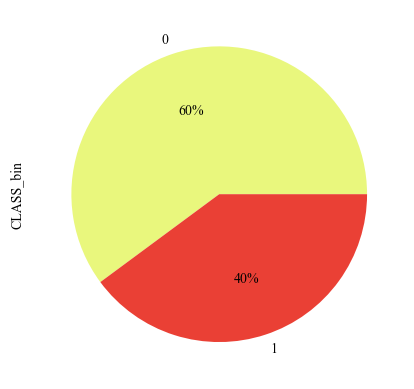

In [274]:
# pie chart

# first color: redish hex code
# second color: yellow-greenish hex code

colors = '#E9F77D', '#EA4035'

# adding percentages

sub_df.CLASS_bin.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=colors)

#### 7.1.2. Exploring CLASS_bin by time frame

In [275]:
# finding the proportion of classes by time frame

byinflow = sub_df.groupby('time_frame').CLASS_bin.value_counts(normalize=True)
byinflow

time_frame    CLASS_bin
time frame 1  0            0.632647
              1            0.367353
time frame 2  1            0.536457
              0            0.463543
Name: CLASS_bin, dtype: float64

#### Remarks
During time frame 1, about 63% of tweets are not negative, while about 37% of tweets are negative. During time frame 2, about 46% of tweets are not negative, while about 54% of tweets are negative.

### 7.2. Exploring by date

In [276]:
# re-establishing time frame datasets (to use binary CLASS)

sub_df_t1 = sub_df[sub_df.time_frame=='time frame 1'].copy()
sub_df_t2 = sub_df[sub_df.time_frame=='time frame 2'].copy()

In [277]:
# finding the proportion of classes for time frame 1 by before or during syrian inflow

bybord = sub_df_t1.groupby('before_inflow').CLASS_bin.value_counts(normalize=True)
bybord

before_inflow  CLASS_bin
False          0            0.633937
               1            0.366063
True           0            0.626600
               1            0.373400
Name: CLASS_bin, dtype: float64

In [278]:
# finding the proportion of classes for time frame 2 by before or during ukrainian inflow

bybord = sub_df_t2.groupby('before_inflow').CLASS_bin.value_counts(normalize=True)
bybord

before_inflow  CLASS_bin
False          1            0.502155
               0            0.497845
True           1            0.639225
               0            0.360775
Name: CLASS_bin, dtype: float64

### 7.3. Exploring by words: "Ukrainian(s)" and "Syrian(s)"
Now that all steps from Notebook 05 have been redone here after the change in keywords, an additional portion of the descriptive analysis will be added: the proportion of tweets that contain the word "Ukrainian", "Ukrainians", "Syrian", or "Syrians".
**NOTE**: The word counts are case-insensitive. For example, tweets with the word "ukrainian" (lowercase 'u') are also counted.

First, however, all cases BEFORE the inflow (because my regression only focuses on during inflow--i.e., from the center time-point onwards) will be dropped.

In [279]:
# dropping all cases before inflow
sub_df = sub_df.drop(sub_df[sub_df.before_inflow == True].index)

In [280]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26367,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,0.187946,0.069247,NEGATIVE,-1,2022-02-26 06:37:36,False,False,False,True,1
26368,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,0.027314,0.010271,NEGATIVE,-1,2022-02-26 04:20:59,False,False,False,True,1
26369,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0.587974,0.143310,NEUTRAL,0,2022-02-25 21:20:48,False,False,False,True,0
26370,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,0.230989,0.716941,POSITIVE,1,2022-02-25 16:37:41,False,False,False,True,0


In [281]:
# resetting index

sub_df = sub_df.reset_index(drop=True)

In [282]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.379315,0.079610,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,0.187946,0.069247,NEGATIVE,-1,2022-02-26 06:37:36,False,False,False,True,1
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,0.027314,0.010271,NEGATIVE,-1,2022-02-26 04:20:59,False,False,False,True,1
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0.587974,0.143310,NEUTRAL,0,2022-02-25 21:20:48,False,False,False,True,0
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,0.230989,0.716941,POSITIVE,1,2022-02-25 16:37:41,False,False,False,True,0


In [283]:
# defining the list of words referring to Syrian(s) and Ukrainian(s)

word_list = ['Ukrainian', 'Ukrainians', 'Syrian', 'Syrians']

In [284]:
# calculating the counts of tweets for each keyword in time frame 1
print("Time Frame 1:")
for keyword in word_list:
    keyword_count = (sub_df_t1['text'].str.contains(keyword, case=False)).sum()
    print(f"{keyword}: {keyword_count} tweets")

# calculating the counts of tweets for each keyword in time frame 2
print("\nTime Frame 2:")
for keyword in word_list:
    keyword_count = (sub_df_t2['text'].str.contains(keyword, case=False)).sum()
    print(f"{keyword}: {keyword_count} tweets")

Time Frame 1:
Ukrainian: 3 tweets
Ukrainians: 1 tweets
Syrian: 348 tweets
Syrians: 23 tweets

Time Frame 2:
Ukrainian: 632 tweets
Ukrainians: 71 tweets
Syrian: 86 tweets
Syrians: 8 tweets


In [285]:
print(3+1+632+71)

print(348+23+86+8)

707
465


In [286]:
# calculating the normalized value counts for each keyword in time frame 1
sub_df_t1_word_counts = sub_df_t1['text'].str.contains('|'.join(word_list), case=False).value_counts(normalize=True)

# calculating the normalized value counts for each keyword in time frame 2
sub_df_t2_word_counts = sub_df_t2['text'].str.contains('|'.join(word_list), case=False).value_counts(normalize=True)


In [287]:
# displaying the results for time frame 1

print("Time Frame 1:")
for keyword in word_list:
    keyword_count = sub_df_t1['text'].str.contains(keyword, case=False).value_counts(normalize=True).get(True, 0) * 100
    print(f"{keyword}: {keyword_count:.2f}%")

# displaying the results for time frame 2
print("\nTime Frame 2:")
for keyword in word_list:
    keyword_count = sub_df_t2['text'].str.contains(keyword, case=False).value_counts(normalize=True).get(True, 0) * 100
    print(f"{keyword}: {keyword_count:.2f}%")

Time Frame 1:
Ukrainian: 0.01%
Ukrainians: 0.00%
Syrian: 1.60%
Syrians: 0.11%

Time Frame 2:
Ukrainian: 12.77%
Ukrainians: 1.43%
Syrian: 1.74%
Syrians: 0.16%


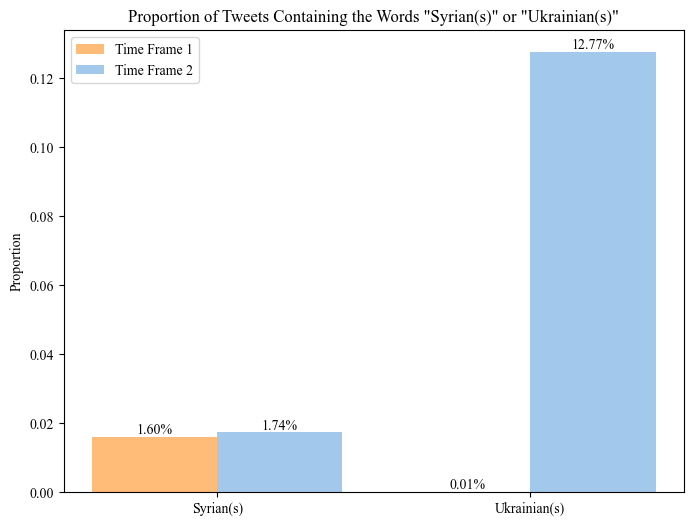

In [288]:
# plotting the proportions

# setting Times New Roman font
matplotlib.rcParams['font.family'] = 'Times New Roman'

# defining the keywords for Syrian and Ukrainian
keywords_syrian = ['Syrian', 'Syrians']
keywords_ukrainian = ['Ukrainian', 'Ukrainians']

# calculating the proportions for Syrian and Ukrainian in time frame 1
proportions_t1 = [
    sub_df_t1['text'].str.contains('|'.join(keywords_syrian), case=False).mean(),
    sub_df_t1['text'].str.contains('|'.join(keywords_ukrainian), case=False).mean()
]

# calculating the proportions for Syrian and Ukrainian in time frame 2
proportions_t2 = [
    sub_df_t2['text'].str.contains('|'.join(keywords_syrian), case=False).mean(),
    sub_df_t2['text'].str.contains('|'.join(keywords_ukrainian), case=False).mean()
]

# defining the colorblind-friendly color palette
colors = ['#1f77b4', '#ff7f0e']

# plotting the bar chart
plt.figure(figsize=(8, 6))

x = range(2)  # Number of keyword groups

# plotting the bars for time frame 1
plt.bar(x, proportions_t1, width=0.4, color='#FFBC79', label='Time Frame 1')

# plotting the bars for time frame 2
plt.bar([i + 0.4 for i in x], proportions_t2, width=0.4, color='#A2C8EC', label='Time Frame 2')

# setting the x-axis tick positions and labels
plt.xticks([i + 0.2 for i in x], ['Syrian(s)', 'Ukrainian(s)'], fontname='Times New Roman')

# setting the y-axis label
plt.ylabel('Proportion', fontname='Times New Roman')

# setting the title of the chart
plt.title('Proportion of Tweets Containing the Words "Syrian(s)" or "Ukrainian(s)"', fontname='Times New Roman')

# adding the legend
plt.legend()

# adding the proportions as text above each bar
for i, proportion in enumerate(proportions_t1):
    plt.text(i, proportion, f'{proportion:.2%}', ha='center', va='bottom', fontname='Times New Roman')

for i, proportion in enumerate(proportions_t2):
    plt.text(i + 0.4, proportion, f'{proportion:.2%}', ha='center', va='bottom', fontname='Times New Roman')

# saving the chart
plt.savefig('Proportion of Tweets Containing the Words "Syrian(s)" or "Ukrainian(s)"', bbox_inches='tight', dpi=200)

# displaying the chart
plt.show()

##### 7.3.1. New variables: word_syrian & word_ukrainian
I will also create 2 new dummy variables:
1. word_syrian: 1 if the tweet contains the word "Syrian(s)"; 0 otherwise
2. word_ukrainian: 1 if the tweet contains the word "Ukrainian(s)"; 0 otherwise

In [289]:
# create a new column 'word_syrian' with initial value 0
sub_df['word_syrian'] = 0

# set the value to 1 if the text contains 'Syrian' or 'Syrians'
sub_df.loc[sub_df['text'].str.contains(r'\bSyrian\b|\bSyrians\b', case=False), 'word_syrian'] = 1

# create a new column 'word_ukrainian' with initial value 0
sub_df['word_ukrainian'] = 0

# set the value to 1 if the text contains 'Ukrainian' or 'Ukrainians'
sub_df.loc[sub_df['text'].str.contains(r'\bUkrainian\b|\bUkrainians\b', case=False), 'word_ukrainian'] = 1


In [290]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin,word_syrian,word_ukrainian
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0,0,0
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0,0,0
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0,0,0
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1,0,0
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,NEGATIVE,-1,2016-04-20 15:22:12,False,False,False,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,NEGATIVE,-1,2022-02-26 06:37:36,False,False,False,True,1,0,0
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,NEGATIVE,-1,2022-02-26 04:20:59,False,False,False,True,1,0,0
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,NEUTRAL,0,2022-02-25 21:20:48,False,False,False,True,0,0,0
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,POSITIVE,1,2022-02-25 16:37:41,False,False,False,True,0,0,0


In [291]:
sub_df.word_syrian.value_counts()

0    21288
1      369
Name: word_syrian, dtype: int64

In [292]:
sub_df.word_ukrainian.value_counts()

0    21036
1      621
Name: word_ukrainian, dtype: int64

369 tweets mention the word "Syrian(s)", and 621 tweets mention the word "Ukrainian(s)". The reason these figures are lower than the total word counts is because of repition of keywords within a single tweet. For example, one tweet could say "Syrian(s)" twice. Or, for example, one tweet could mention both "Syrian(s)" and "Ukrainian(s)".

Now, I want to vizualize the proportion of tweets that are negative vs not negative.

Then, I want to create a dataframe that contains the words "Syrian(s)" and a dataframe that contains the words "Ukrainian(s)". I will then to vizualize the proportion of tweets that are negative vs not negative for each time frame and for each dataframe to compare against the overall dataframe.

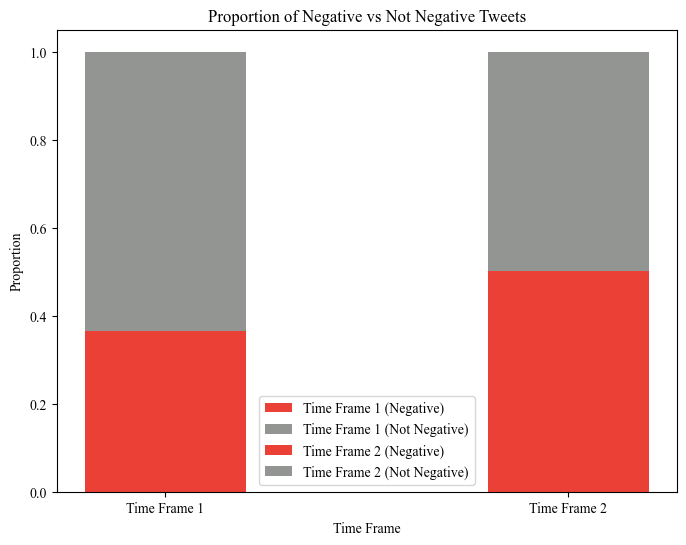

In [293]:
# bar chart for overall dataframe

# filtering the DataFrame for time frame 1
sub_df_t1 = sub_df[sub_df['time_frame'] == 'time frame 1']

# filtering the DataFrame for time frame 2
sub_df_t2 = sub_df[sub_df['time_frame'] == 'time frame 2']

# calculating the proportions of negative and not negative tweets for time frame 1
t1_proportions = sub_df_t1['CLASS_bin'].value_counts(normalize=True)

# calculating the proportions of negative and not negative tweets for time frame 2
t2_proportions = sub_df_t2['CLASS_bin'].value_counts(normalize=True)

# defining the color palette
colors = ['#EA4035', '#939593']

# creating the bar chart
plt.figure(figsize=(8, 6))

# adding the bars for time frame 1
plt.bar(0, t1_proportions[1], width=0.4, color=colors[0], label='Time Frame 1 (Negative)')
plt.bar(0, t1_proportions[0], width=0.4, bottom=t1_proportions[1], color=colors[1], label='Time Frame 1 (Not Negative)')

# adding the bars for time frame 2
plt.bar(1, t2_proportions[1], width=0.4, color=colors[0], label='Time Frame 2 (Negative)')
plt.bar(1, t2_proportions[0], width=0.4, bottom=t2_proportions[1], color=colors[1], label='Time Frame 2 (Not Negative)')

# setting the x-axis tick labels and title
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets')

# adding the legend
plt.legend()

# displaying the chart
plt.show()

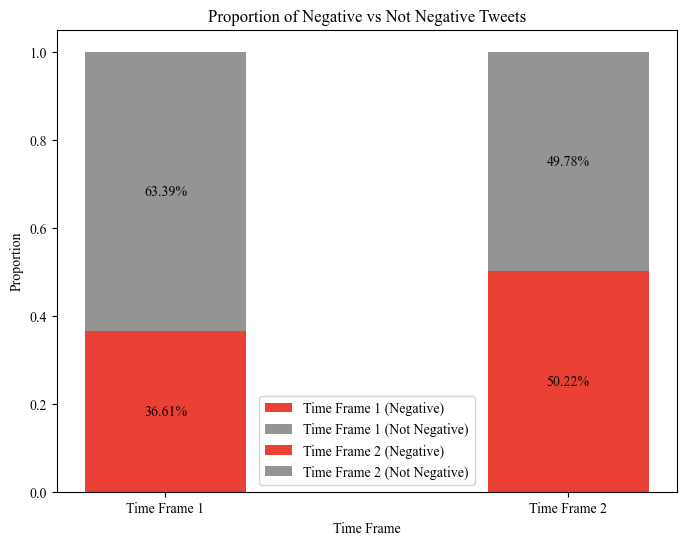

In [294]:
# bar chart for overall dataframe

# filtering the DataFrame for time frame 1
sub_df_t1 = sub_df[sub_df['time_frame'] == 'time frame 1']

# filtering the DataFrame for time frame 2
sub_df_t2 = sub_df[sub_df['time_frame'] == 'time frame 2']

# calculating the proportions of negative and not negative tweets for time frame 1
t1_proportions = sub_df_t1['CLASS_bin'].value_counts(normalize=True)

# calculating the proportions of negative and not negative tweets for time frame 2
t2_proportions = sub_df_t2['CLASS_bin'].value_counts(normalize=True)

# defining the color palette
colors = ['#EA4035', '#939593']

# creating the bar chart
plt.figure(figsize=(8, 6))

# adding the bars for time frame 1
plt.bar(0, t1_proportions[1], width=0.4, color=colors[0], label='Time Frame 1 (Negative)')
plt.bar(0, t1_proportions[0], width=0.4, bottom=t1_proportions[1], color=colors[1], label='Time Frame 1 (Not Negative)')

# adding the bars for time frame 2
plt.bar(1, t2_proportions[1], width=0.4, color=colors[0], label='Time Frame 2 (Negative)')
plt.bar(1, t2_proportions[0], width=0.4, bottom=t2_proportions[1], color=colors[1], label='Time Frame 2 (Not Negative)')

# setting the x-axis tick labels and title
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets')

# adding the proportions of negative tweets as text
plt.text(0, t1_proportions[1] / 2, f'{t1_proportions[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(0, t1_proportions[1] + t1_proportions[0] / 2, f'{t1_proportions[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, t2_proportions[1] / 2, f'{t2_proportions[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, t2_proportions[1] + t2_proportions[0] / 2, f'{t2_proportions[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding the legend
plt.legend()

# displaying the chart
plt.show()


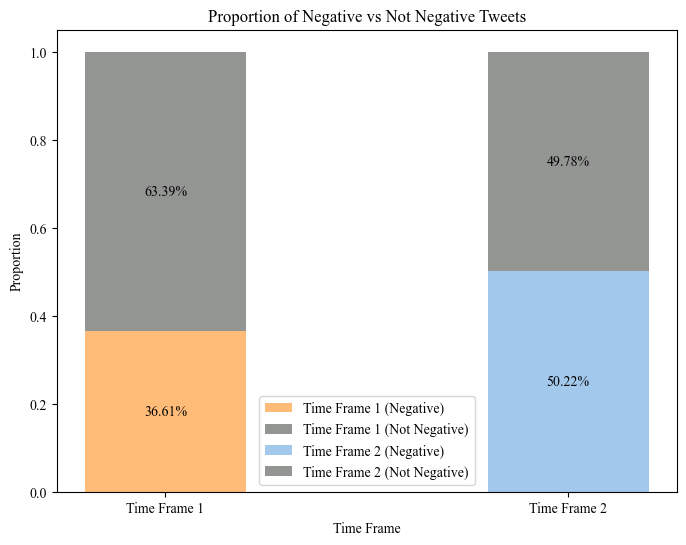

In [295]:
# bar chart for overall dataframe

# filtering the DataFrame for time frame 1
sub_df_t1 = sub_df[sub_df['time_frame'] == 'time frame 1']

# filtering the DataFrame for time frame 2
sub_df_t2 = sub_df[sub_df['time_frame'] == 'time frame 2']

# calculating the proportions of negative and not negative tweets for time frame 1
t1_proportions = sub_df_t1['CLASS_bin'].value_counts(normalize=True)

# calculating the proportions of negative and not negative tweets for time frame 2
t2_proportions = sub_df_t2['CLASS_bin'].value_counts(normalize=True)

# defining the color palette
colors = ['#EA4035', '#939593']

# defining the colors for negative proportions in each time frame
t1_negative_color = '#FFBC79'
t2_negative_color = '#A2C8EC'

# creating the bar chart
plt.figure(figsize=(8, 6))

# adding the bars for time frame 1
plt.bar(0, t1_proportions[1], width=0.4, color=t1_negative_color, label='Time Frame 1 (Negative)')
plt.bar(0, t1_proportions[0], width=0.4, bottom=t1_proportions[1], color=colors[1], label='Time Frame 1 (Not Negative)')

# adding the bars for time frame 2
plt.bar(1, t2_proportions[1], width=0.4, color=t2_negative_color, label='Time Frame 2 (Negative)')
plt.bar(1, t2_proportions[0], width=0.4, bottom=t2_proportions[1], color=colors[1], label='Time Frame 2 (Not Negative)')

# setting the x-axis tick labels and title
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets')

# adding the proportions of negative tweets as text
plt.text(0, t1_proportions[1] / 2, f'{t1_proportions[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(0, t1_proportions[1] + t1_proportions[0] / 2, f'{t1_proportions[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, t2_proportions[1] / 2, f'{t2_proportions[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, t2_proportions[1] + t2_proportions[0] / 2, f'{t2_proportions[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding the legend
plt.legend()

# displaying the chart
plt.show()


In [296]:
# creating a dataframe of only tweets that contain the word "Syrian" or "Syrians"
sub_df_words_syrians = sub_df[sub_df['text'].str.contains('Syrian|Syrians', case=False)]

# creating a dataframe of only tweets that contain the word "Ukrainian" or "Ukrainians"
sub_df_words_ukrainians = sub_df[sub_df['text'].str.contains('Ukrainian|Ukrainians', case=False)]

Below is the bar chart for both:

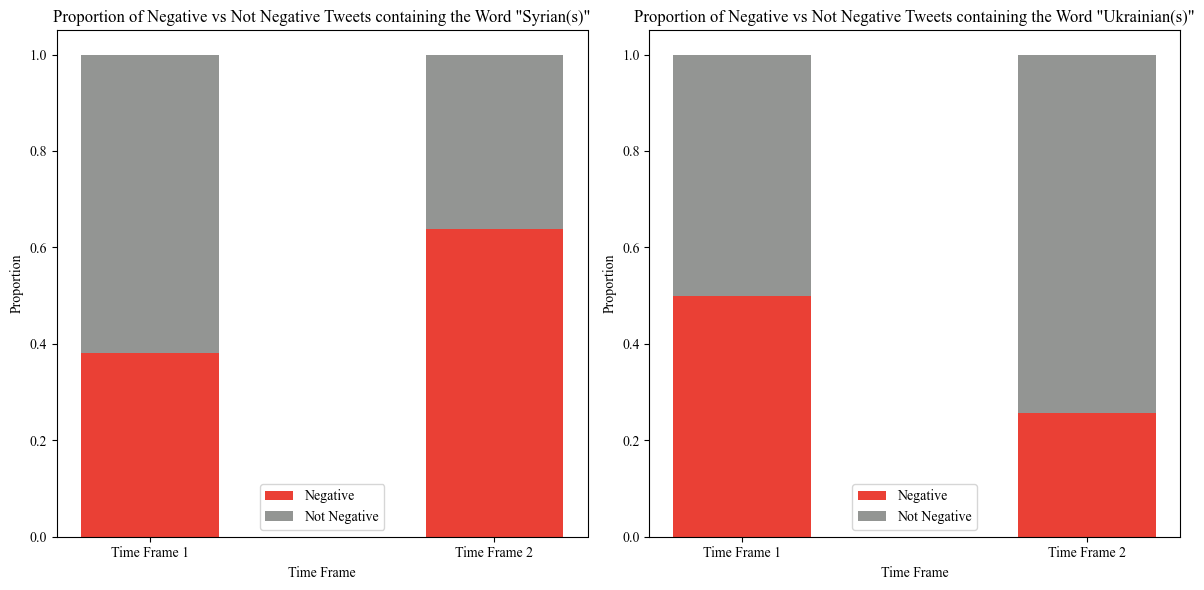

In [297]:
# calculating the proportions of negative and not negative tweets for time frame 1 and 2 with "Syrian(s)"
syrian_proportions_t1 = sub_df_words_syrians[sub_df_words_syrians['time_frame'] == 'time frame 1']['CLASS_bin'].value_counts(normalize=True)
syrian_proportions_t2 = sub_df_words_syrians[sub_df_words_syrians['time_frame'] == 'time frame 2']['CLASS_bin'].value_counts(normalize=True)

# calculating the proportions of negative and not negative tweets for time frame 1 and 2 with "Ukrainian(s)"
ukrainian_proportions_t1 = sub_df_words_ukrainians[sub_df_words_ukrainians['time_frame'] == 'time frame 1']['CLASS_bin'].value_counts(normalize=True)
ukrainian_proportions_t2 = sub_df_words_ukrainians[sub_df_words_ukrainians['time_frame'] == 'time frame 2']['CLASS_bin'].value_counts(normalize=True)

# creating the bar chart
plt.figure(figsize=(12, 6))

# adding the bars for time frame 1 and 2 with "Syrian(s)"
plt.subplot(1, 2, 1)
plt.bar([0, 1], [syrian_proportions_t1[1], syrian_proportions_t2[1]], width=0.4, color=colors[0], label='Negative')
plt.bar([0, 1], [syrian_proportions_t1[0], syrian_proportions_t2[0]], width=0.4, bottom=[syrian_proportions_t1[1], syrian_proportions_t2[1]], color=colors[1], label='Not Negative')
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets containing the Word "Syrian(s)"')
plt.legend()

# adding the bars for time frame 1 and 2 with "Ukrainian(s)"
plt.subplot(1, 2, 2)
plt.bar([0, 1], [ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], width=0.4, color=colors[0], label='Negative')
plt.bar([0, 1], [ukrainian_proportions_t1[0], ukrainian_proportions_t2[0]], width=0.4, bottom=[ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], color=colors[1], label='Not Negative')
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets containing the Word "Ukrainian(s)"')
plt.legend()

# adjusting the layout to prevent labels from being cut off
plt.tight_layout()

# displaying the chart
plt.show()


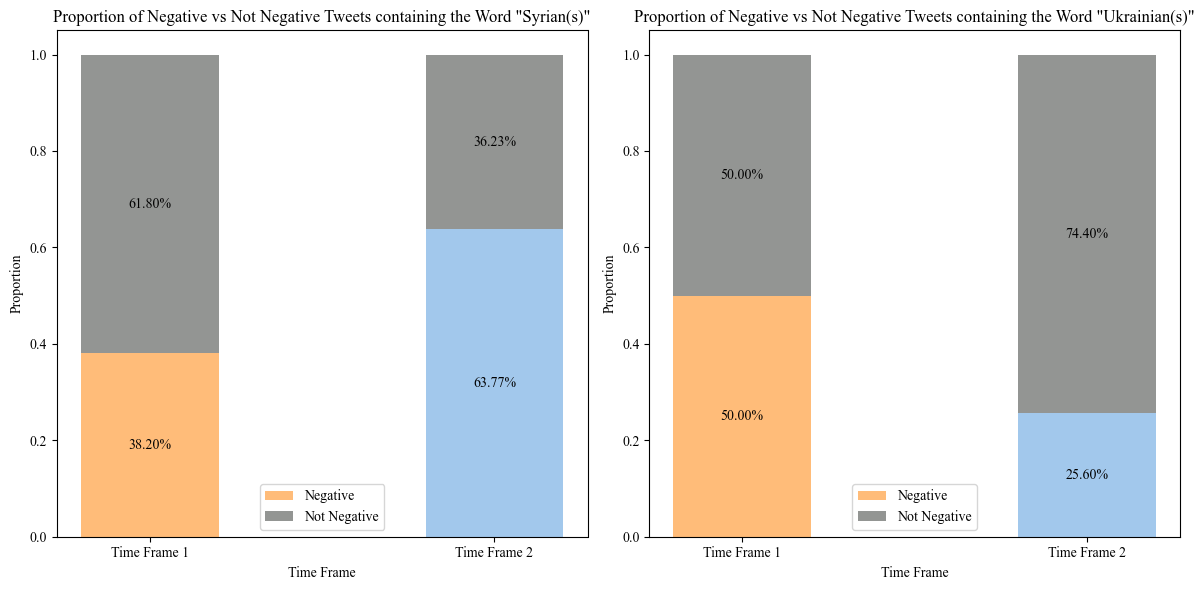

In [298]:
# creating the bar chart
plt.figure(figsize=(12, 6))

# adding the bars for time frame 1 and 2 with "Syrian(s)"
plt.subplot(1, 2, 1)
plt.bar([0, 1], [syrian_proportions_t1[1], syrian_proportions_t2[1]], width=0.4, color=['#FFBC79', '#A2C8EC'], label='Negative')
plt.bar([0, 1], [syrian_proportions_t1[0], syrian_proportions_t2[0]], width=0.4, bottom=[syrian_proportions_t1[1], syrian_proportions_t2[1]], color=colors[1], label='Not Negative')
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets containing the Word "Syrian(s)"')
plt.legend()

# adding the text labels for the proportion of negative tweets
plt.text(0, syrian_proportions_t1[1] / 2, f'{syrian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(0, syrian_proportions_t1[1] + syrian_proportions_t1[0] / 2, f'{syrian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, syrian_proportions_t2[1] / 2, f'{syrian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, syrian_proportions_t2[1] + syrian_proportions_t2[0] / 2, f'{syrian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding the bars for time frame 1 and 2 with "Ukrainian(s)"
plt.subplot(1, 2, 2)
plt.bar([0, 1], [ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], width=0.4, color=['#FFBC79', '#A2C8EC'], label='Negative')
plt.bar([0, 1], [ukrainian_proportions_t1[0], ukrainian_proportions_t2[0]], width=0.4, bottom=[ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], color=colors[1], label='Not Negative')
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets containing the Word "Ukrainian(s)"')
plt.legend()

# adding the text labels for the proportion of negative tweets
plt.text(0, ukrainian_proportions_t1[1] / 2, f'{ukrainian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(0, ukrainian_proportions_t1[1] + ukrainian_proportions_t1[0] / 2, f'{ukrainian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, ukrainian_proportions_t2[1] / 2, f'{ukrainian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, ukrainian_proportions_t2[1] + ukrainian_proportions_t2[0] / 2, f'{ukrainian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adjusting the layout and displaying the chart
plt.tight_layout()
plt.show()





Graph for just the tweets containing "Syrian(s)":

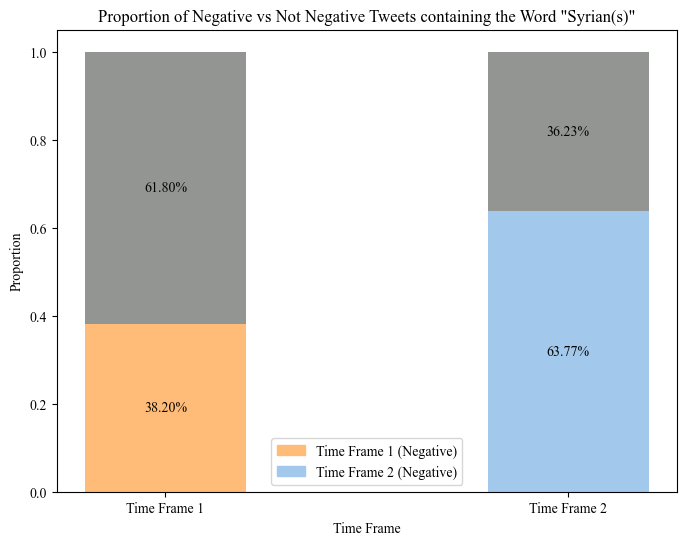

In [299]:
# calculating the proportions of negative and not negative tweets for time frame 1
syrian_proportions_t1 = sub_df_words_syrians[sub_df_words_syrians['time_frame'] == 'time frame 1']['CLASS_bin'].value_counts(normalize=True)

# calculating the proportions of negative and not negative tweets for time frame 2
syrian_proportions_t2 = sub_df_words_syrians[sub_df_words_syrians['time_frame'] == 'time frame 2']['CLASS_bin'].value_counts(normalize=True)

# defining the color palette
colors = ['#EA4035', '#939593']

# defining the colors for negative proportions in each time frame
t1_negative_color = '#FFBC79'
t2_negative_color = '#A2C8EC'

# creating the bar chart
plt.figure(figsize=(8, 6))

# adding the bars for time frame 1 and 2
plt.bar([0, 1], [syrian_proportions_t1[1], syrian_proportions_t2[1]], width=0.4, color=[t1_negative_color, t2_negative_color], label='Negative')
plt.bar([0, 1], [syrian_proportions_t1[0], syrian_proportions_t2[0]], width=0.4, bottom=[syrian_proportions_t1[1], syrian_proportions_t2[1]], color=colors[1], label='Not Negative')

# setting the x-axis tick labels and title
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets containing the Word "Syrian(s)"')

# adding the proportions of negative tweets as text for time frame 1
plt.text(0, syrian_proportions_t1[1] / 2, f'{syrian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(0, syrian_proportions_t1[1] + syrian_proportions_t1[0] / 2, f'{syrian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding the proportions of negative tweets as text for time frame 2
plt.text(1, syrian_proportions_t2[1] / 2, f'{syrian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, syrian_proportions_t2[1] + syrian_proportions_t2[0] / 2, f'{syrian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding the legend for both time frames
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=t1_negative_color),
    plt.Rectangle((0, 0), 1, 1, color=t2_negative_color)
]

plt.legend(legend_handles, ['Time Frame 1 (Negative)', 'Time Frame 2 (Negative)'], loc='lower center')

# displaying the chart
plt.show()


Graph for just the tweets containing "Ukrainian(s)":

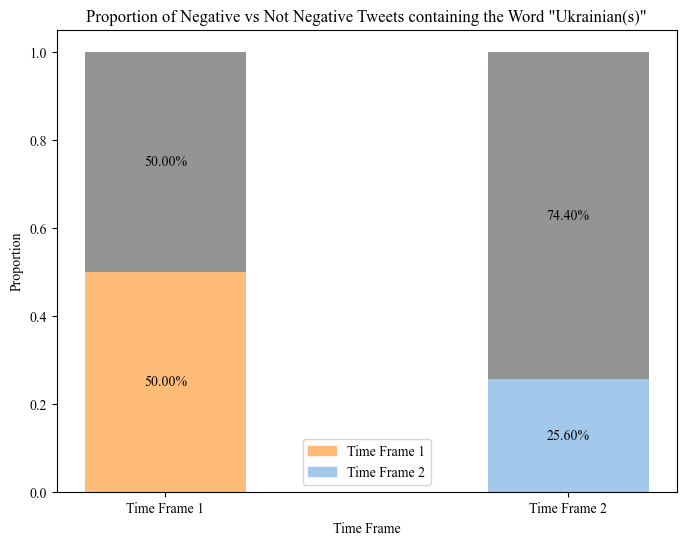

In [300]:
# calculating the proportions of negative and not negative tweets for time frame 1
ukrainian_proportions_t1 = sub_df_words_ukrainians[sub_df_words_ukrainians['time_frame'] == 'time frame 1']['CLASS_bin'].value_counts(normalize=True)

# calculating the proportions of negative and not negative tweets for time frame 2
ukrainian_proportions_t2 = sub_df_words_ukrainians[sub_df_words_ukrainians['time_frame'] == 'time frame 2']['CLASS_bin'].value_counts(normalize=True)

# defining the color palette
colors = ['#EA4035', '#939593']

# defining the colors for negative proportions in each time frame
t1_negative_color = '#FFBC79'
t2_negative_color = '#A2C8EC'

# creating the bar chart
plt.figure(figsize=(8, 6))

# adding the bars for time frame 1 and 2
plt.bar([0, 1], [ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], width=0.4, color=[t1_negative_color, t2_negative_color], label='Negative')
plt.bar([0, 1], [ukrainian_proportions_t1[0], ukrainian_proportions_t2[0]], width=0.4, bottom=[ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], color=colors[1], label='Not Negative')

# setting the x-axis tick labels and title
plt.xticks([0, 1], ['Time Frame 1', 'Time Frame 2'])
plt.xlabel('Time Frame')
plt.ylabel('Proportion')
plt.title('Proportion of Negative vs Not Negative Tweets containing the Word "Ukrainian(s)"')

# adding the proportions of negative tweets as text for time frame 1
plt.text(0, ukrainian_proportions_t1[1] / 2, f'{ukrainian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(0, ukrainian_proportions_t1[1] + ukrainian_proportions_t1[0] / 2, f'{ukrainian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding the proportions of negative tweets as text for time frame 2
plt.text(1, ukrainian_proportions_t2[1] / 2, f'{ukrainian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
plt.text(1, ukrainian_proportions_t2[1] + ukrainian_proportions_t2[0] / 2, f'{ukrainian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding the legend for both time frames
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=t1_negative_color),
    plt.Rectangle((0, 0), 1, 1, color=t2_negative_color)
]

plt.legend(legend_handles, ['Time Frame 1', 'Time Frame 2'])

# displaying the chart
plt.show()


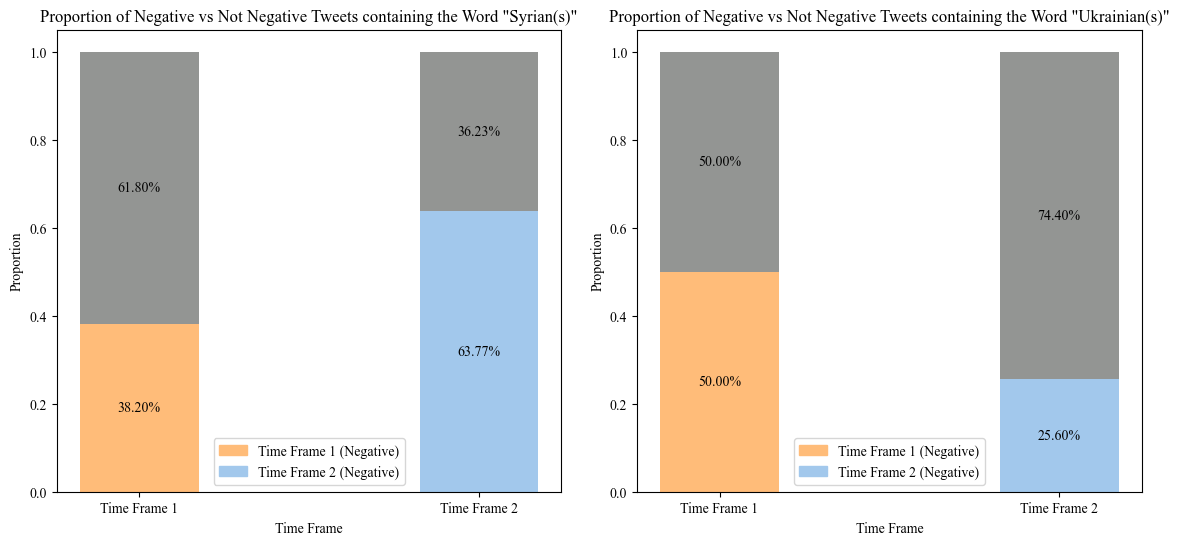

In [301]:
# creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plotting for the first graph (tweets containing "Syrian(s)")
axs[0].bar([0, 1], [syrian_proportions_t1[1], syrian_proportions_t2[1]], width=0.35, color=[t1_negative_color, t2_negative_color], label='Negative')
axs[0].bar([0, 1], [syrian_proportions_t1[0], syrian_proportions_t2[0]], width=0.35, bottom=[syrian_proportions_t1[1], syrian_proportions_t2[1]], color=colors[1], label='Not Negative')

axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Time Frame 1', 'Time Frame 2'])
axs[0].set_xlabel('Time Frame')
axs[0].set_ylabel('Proportion')
axs[0].set_title('Proportion of Negative vs Not Negative Tweets containing the Word "Syrian(s)"')

axs[0].text(0, syrian_proportions_t1[1] / 2, f'{syrian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[0].text(0, syrian_proportions_t1[1] + syrian_proportions_t1[0] / 2, f'{syrian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[0].text(1, syrian_proportions_t2[1] / 2, f'{syrian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[0].text(1, syrian_proportions_t2[1] + syrian_proportions_t2[0] / 2, f'{syrian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding legend for the first graph
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=t1_negative_color),
    plt.Rectangle((0, 0), 1, 1, color=t2_negative_color)
]
axs[0].legend(legend_handles, ['Time Frame 1 (Negative)', 'Time Frame 2 (Negative)'])

# plotting for the second graph (tweets containing "Ukrainian(s)")
axs[1].bar([0, 1], [ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], width=0.35, color=[t1_negative_color, t2_negative_color], label='Negative')
axs[1].bar([0, 1], [ukrainian_proportions_t1[0], ukrainian_proportions_t2[0]], width=0.35, bottom=[ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], color=colors[1], label='Not Negative')

axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Time Frame 1', 'Time Frame 2'])
axs[1].set_xlabel('Time Frame')
axs[1].set_ylabel('Proportion')
axs[1].set_title('Proportion of Negative vs Not Negative Tweets containing the Word "Ukrainian(s)"')

axs[1].text(0, ukrainian_proportions_t1[1] / 2, f'{ukrainian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[1].text(0, ukrainian_proportions_t1[1] + ukrainian_proportions_t1[0] / 2, f'{ukrainian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[1].text(1, ukrainian_proportions_t2[1] / 2, f'{ukrainian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[1].text(1, ukrainian_proportions_t2[1] + ukrainian_proportions_t2[0] / 2, f'{ukrainian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding legend for the second graph
axs[1].legend(legend_handles, ['Time Frame 1 (Negative)', 'Time Frame 2 (Negative)'])

# adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.15)

# saving the chart
plt.savefig('Proportion of Negative vs Not Negative Tweets Containing the Words "Syrian(s)" and "Ukrainian(s)"', bbox_inches='tight', dpi=200)

# displaying the chart
plt.show()



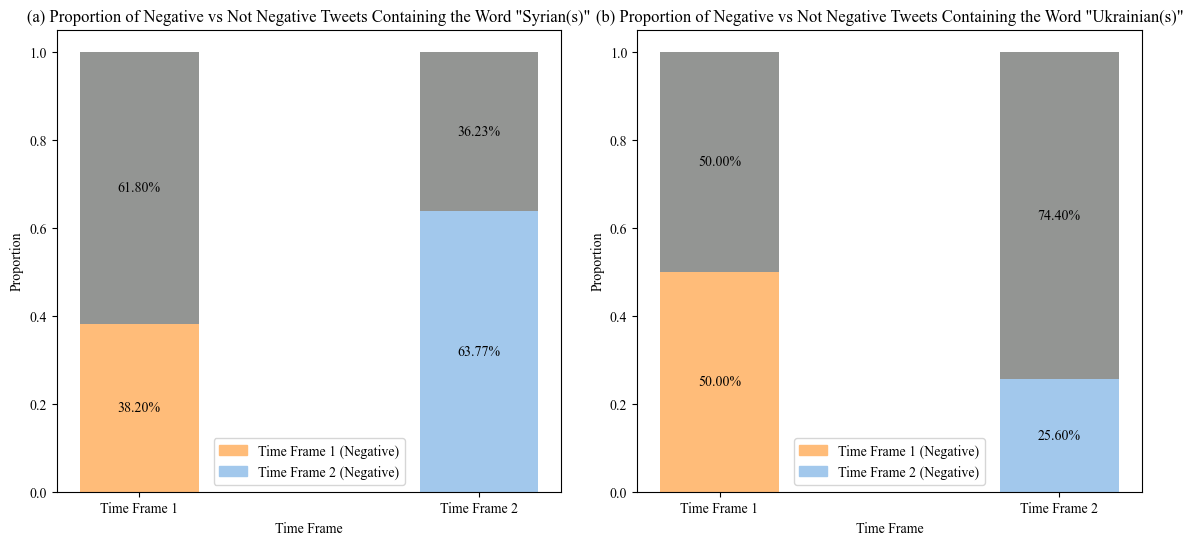

In [302]:
# creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plotting for the first graph (tweets containing "Syrian(s)")
axs[0].bar([0, 1], [syrian_proportions_t1[1], syrian_proportions_t2[1]], width=0.35, color=[t1_negative_color, t2_negative_color], label='Negative')
axs[0].bar([0, 1], [syrian_proportions_t1[0], syrian_proportions_t2[0]], width=0.35, bottom=[syrian_proportions_t1[1], syrian_proportions_t2[1]], color=colors[1], label='Not Negative')

axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Time Frame 1', 'Time Frame 2'])
axs[0].set_xlabel('Time Frame')
axs[0].set_ylabel('Proportion')
axs[0].set_title('(a) Proportion of Negative vs Not Negative Tweets Containing the Word "Syrian(s)"')

axs[0].text(0, syrian_proportions_t1[1] / 2, f'{syrian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[0].text(0, syrian_proportions_t1[1] + syrian_proportions_t1[0] / 2, f'{syrian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[0].text(1, syrian_proportions_t2[1] / 2, f'{syrian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[0].text(1, syrian_proportions_t2[1] + syrian_proportions_t2[0] / 2, f'{syrian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding legend for the first graph
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=t1_negative_color),
    plt.Rectangle((0, 0), 1, 1, color=t2_negative_color)
]
axs[0].legend(legend_handles, ['Time Frame 1 (Negative)', 'Time Frame 2 (Negative)'])

# plotting for the second graph (tweets containing "Ukrainian(s)")
axs[1].bar([0, 1], [ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], width=0.35, color=[t1_negative_color, t2_negative_color], label='Negative')
axs[1].bar([0, 1], [ukrainian_proportions_t1[0], ukrainian_proportions_t2[0]], width=0.35, bottom=[ukrainian_proportions_t1[1], ukrainian_proportions_t2[1]], color=colors[1], label='Not Negative')

axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Time Frame 1', 'Time Frame 2'])
axs[1].set_xlabel('Time Frame')
axs[1].set_ylabel('Proportion')
axs[1].set_title('(b) Proportion of Negative vs Not Negative Tweets Containing the Word "Ukrainian(s)"')

axs[1].text(0, ukrainian_proportions_t1[1] / 2, f'{ukrainian_proportions_t1[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[1].text(0, ukrainian_proportions_t1[1] + ukrainian_proportions_t1[0] / 2, f'{ukrainian_proportions_t1[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[1].text(1, ukrainian_proportions_t2[1] / 2, f'{ukrainian_proportions_t2[1]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')
axs[1].text(1, ukrainian_proportions_t2[1] + ukrainian_proportions_t2[0] / 2, f'{ukrainian_proportions_t2[0]:.2%}', ha='center', va='center', color='black', fontname='Times New Roman')

# adding legend for the second graph
axs[1].legend(legend_handles, ['Time Frame 1 (Negative)', 'Time Frame 2 (Negative)'])

# adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.15)

# saving the chart
plt.savefig('Proportion of Negative vs Not Negative Tweets Containing the Words "Syrian(s)" and "Ukrainian(s)"', bbox_inches='tight', dpi=200)

# displaying the chart
plt.show()


#### Remarks

During time frame 1, almost no tweets contain the word "Ukrainian" (0.01%) or "Ukrainians" (0%), while 1.60% contain the word "Syrian" and 0.11% contain the word "Syrians".

During time frame 2, 12.77% contain the word "Ukrainian" and 1.43% contain the word "Ukrainians", while 1.74% contain the word "Syrian" and 0.16% contain the word "Syrians".

Grouping the singular and plural forms together, during time frame 1, only 0.01% of tweets said "Ukrainian(s)", while 1.71% said "Syrian(s)". By contrast, during time frame 2, 14.2% said "Ukrainian(s)", and 1.9% said "Syrian(s)".

It is not suprising that Ukrainians are almost never referred to during the first time frame, as it took place at a time when Ukrainians were not typically seen to be refugees in Germany. Interestingly, however, during the second time frame, Syrians are referred to to a similar extent as during the first time frame. One could imagine that this might be because twitter users during time frame 2 may be comparing the Ukrainian refugees to the Syrian refugees.

## 8. Exploring numeric CLASS

In [303]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21657 entries, 0 to 21656
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   text                             21657 non-null  object        
 1   author_id                        21657 non-null  float64       
 2   created_at                       21657 non-null  object        
 3   lang                             21657 non-null  object        
 4   geo.place_id                     21366 non-null  object        
 5   public_metrics.retweet_count     21657 non-null  float64       
 6   public_metrics.reply_count       21657 non-null  float64       
 7   public_metrics.like_count        21657 non-null  float64       
 8   public_metrics.quote_count       21657 non-null  float64       
 9   public_metrics.impression_count  21657 non-null  float64       
 10  geo.coordinates.coordinates      2627 non-null   object   

In [304]:
# re-establishing time frame datasets (to use numeric CLASS)

sub_df_t1 = sub_df[sub_df.time_frame=='time frame 1'].copy()
sub_df_t2 = sub_df[sub_df.time_frame=='time frame 2'].copy()

In [305]:
sub_df_t1.num_CLASS.describe()

count    17945.000000
mean        -0.277125
std          0.615000
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: num_CLASS, dtype: float64

In [306]:
sub_df_t2.num_CLASS.describe()

count    3712.000000
mean       -0.377963
std         0.695429
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         0.000000
max         1.000000
Name: num_CLASS, dtype: float64

## 9. Creating control variables
In this section, I create several possible control variables indicating the economic situation and the size of the foreign population. I then test for multicollineariy and select the ones least likely to cause problems.

### 9.1. Economic situation
#### 9.1.1. Unemployment
I will assign all observations published in each year a corresponding yearly unemployment rate, "unemp"

time frame 1:
* 2014: **0.067** (6.7%)
* 2015: **0.064** (6.4%)
* 2016: **0.061** (6.1%)

time frame 2:
* 2021: **0.057** (5.7%)
* 2022: **0.054** (5.4%)

I will also create a variable indicating monthly unemployment rate, "month_unemp".

2015:
* 2015-08: **0.041** (4.1%)
* 2015-09: **0.040** (4.0%)
* 2015-10 **0.041** (4.1%)
* 2015-11 **0.043** (4.3%)
* 2015-12 **0.042** (4.2%)

2016:
* 2016-01: **0.041** (4.1%)
* 2016-02: **0.044** (4.4%)
* 2016-03 **0.043** (4.3%)
* 2016-04: **0.040** (4.0%)

2022:
* 2022-02: **0.032** (3.2%)
* 2022-03: **0.030** (3.0%)
* 2022-04: **0.032** (3.2%)
* 2022-05: **0.029** (2.9%)
* 2022-06: **0.029** (2.9%)
* 2022-07: **0.034** (3.4%)
* 2022-08: **0.031** (3.1%)
* 2022-09: **0.029** (2.9%)
* 2022-10: **0.029** (2.9%)

In [307]:
sub_df.year.value_counts()

2015.0    11763
2016.0     6182
2022.0     3712
Name: year, dtype: int64

In [308]:
# creating "unemp"

sub_df['unemp'] = np.where(sub_df['year'] == 2014, 0.067, 
                      np.where(sub_df['year'] == 2015, 0.064, 
                               np.where(sub_df['year'] == 2016, 0.061,
                                        np.where(sub_df['year'] == 2021, 0.057,
                                                 np.where(sub_df['year'] == 2022, 0.054, np.nan)))))


In [309]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin,word_syrian,word_ukrainian,unemp
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0,2016-04-20 21:27:37,False,False,False,True,0,0,0,0.061
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0,2016-04-20 21:18:58,False,False,False,True,0,0,0,0.061
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,1,2016-04-20 18:25:11,False,False,False,True,0,0,0,0.061
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,-1,2016-04-20 16:27:28,False,False,False,True,1,0,0,0.061
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,-1,2016-04-20 15:22:12,False,False,False,True,1,0,0,0.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,-1,2022-02-26 06:37:36,False,False,False,True,1,0,0,0.054
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,-1,2022-02-26 04:20:59,False,False,False,True,1,0,0,0.054
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0,2022-02-25 21:20:48,False,False,False,True,0,0,0,0.054
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,1,2022-02-25 16:37:41,False,False,False,True,0,0,0,0.054


In [310]:
# creating "month_unemp"

month_unemp_map = {'2015-08': 0.041, '2015-09': 0.040, '2015-10': 0.041, '2015-11': 0.043, '2015-12': 0.042, '2016-01': 0.041, '2016-02': 0.044, '2016-03': 0.043, '2016-04': 0.040, '2022-02': 0.032, '2022-03': 0.030, '2022-04': 0.032, '2022-05': 0.029, '2022-06': 0.029, '2022-07': 0.034, '2022-08': 0.031, '2022-09': 0.029, '2022-10': 0.029}

sub_df['month_unemp'] = sub_df['year-month'].map(month_unemp_map)

In [311]:
sub_df.month_unemp.value_counts()

0.041    5677
0.040    5039
0.043    3787
0.044    1942
0.042    1500
0.030    1364
0.029    1316
0.032     560
0.031     255
0.034     217
Name: month_unemp, dtype: int64

In [312]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin,word_syrian,word_ukrainian,unemp,month_unemp
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,2016-04-20 21:27:37,False,False,False,True,0,0,0,0.061,0.040
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,2016-04-20 21:18:58,False,False,False,True,0,0,0,0.061,0.040
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,2016-04-20 18:25:11,False,False,False,True,0,0,0,0.061,0.040
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,2016-04-20 16:27:28,False,False,False,True,1,0,0,0.061,0.040
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,2016-04-20 15:22:12,False,False,False,True,1,0,0,0.061,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,2022-02-26 06:37:36,False,False,False,True,1,0,0,0.054,0.032
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,2022-02-26 04:20:59,False,False,False,True,1,0,0,0.054,0.032
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,2022-02-25 21:20:48,False,False,False,True,0,0,0,0.054,0.032
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,2022-02-25 16:37:41,False,False,False,True,0,0,0,0.054,0.032


#### 9.1.2. GDP 
##### 9.1.2.1. *GDP volume growth*

In this section, I add GDP volume growth to the existing data frame. This data is taken from OECD Statistics on **GDP volume growth**. It refers to year-to-year changes in the Real GDP. It is therefore adjusted for changes in prices.

* 2015: 1.24%
* 2016: 2.14%
* 2022: 1.77%

In [313]:
# creating "GDP_vol"

GDP_vol_map = {2015: 1.24, 2016: 2.14, 2022: 1.77}

sub_df['GDP_vol'] = sub_df['year'].map(GDP_vol_map)

In [314]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin,word_syrian,word_ukrainian,unemp,month_unemp,GDP_vol
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,0,0,0,0.061,0.040,2.14
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,0,0,0,0.061,0.040,2.14
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,False,False,False,True,0,0,0,0.061,0.040,2.14
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,False,False,False,True,1,0,0,0.061,0.040,2.14
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,False,False,False,True,1,0,0,0.061,0.040,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,1,0,0,0.054,0.032,1.77
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,1,0,0,0.054,0.032,1.77
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,False,False,False,True,0,0,0,0.054,0.032,1.77
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,False,False,False,True,0,0,0,0.054,0.032,1.77


##### 9.1.2.2. *GDP volume per capita*
Here, I create a variable called GDP_vol_c that divides total GDP volume by the total population, therefore indicating the GDP volume per capita.

* 2015: 604366810000 / 82175684
* 2016: 626328390000 / 82521653
* 2022: 670768243380.57 / 84300000

In [315]:
print("2015: " + str(604366810000 / 82175684))
print("2016: " + str(626328390000 / 82521653))
print("2022: " + str(670768243380.57 / 84300000))

2015: 7354.5698749523035
2016: 7589.867231573754
2022: 7956.918664063701


In [316]:
# creating "GDP_vol_c"

GDP_vol_c_map = {2015: 7354.5698749523035, 2016: 7589.867231573754, 2022: 7956.918664063701}

sub_df['GDP_vol_c'] = sub_df['year'].map(GDP_vol_c_map)

##### 9.1.2.3. *GDP volume in USD at constant purchasing power parities*

Here, I add GDP volume in US Dollars at constant purchasing power parity. I will call this variable "GDP_PPP". This is also taken from OECD Statistics. Having constant purchasing power parity helps measure the relative value of different currencies over time. It aims to provide a more accurate comparison of economic indicators between countries by taking into account changes in the purchasing power of money due to inflation.

I also want to make it per capita. So I need to divide it by the total population that year.

2015: 3885430489555.89 / 82175684

2016: 3968750753434.50 / 82521653

2022: 4179453724133.19 / 84300000


In [317]:
print("2015: " + str(3885430489555.89 / 82175684))
print("2016: " + str(3968750753434.50 / 82521653))
print("2022: " + str(4179453724133.19 / 84300000))

2015: 47281.997549979504
2016: 48093.447103325714
2022: 49578.33599209003


In [318]:
# creating "GDP_PPP"

GDP_PPP_map = {2015: 47281.997549979504, 2016: 48093.447103325714, 2022: 49578.33599209003}

sub_df['GDP_PPP'] = sub_df['year'].map(GDP_PPP_map)

### 9.2. Foreign population size

In this section, I add several variables to the dataframe to indicate the size of the foreign population. These include:
* foreign_arrivals: number of yearly foreign arrivals
* foreign_share: number of yearly foreign arrivals divided by the total population
* change_foreign_chare: change in foreign_share from the previous year

In [319]:
# calculating yearly foreign arrivals by adding monthly totals

print(99093 + 112036 + 548320 + 303528 + 218366 + 167121 + 166599 + 194849 + 197346 + 190158 + 156928 + 133016)

2487360


#### 9.2.1. Foreign arrivals

* 2015: 2,016,241
* 2016: 1,719,075
* 2022: 2,487,360

In [320]:
# creating "foreign_arrivals"

foreign_arrivals_map = {2015: 2016241, 2016: 1719075, 2022: 2487360}

sub_df['foreign_arrivals'] = sub_df['year'].map(foreign_arrivals_map)

#### 9.2.2. Foreign share
I define foreign share, here, as the number of foreign arrivals in relation to the total population. Therefore, I divide yearly foreign arrivals by yearly total population. This data is retrieved from Genesis Destatis table 12411-0001 and https://www.destatis.de/EN/Press/2023/01/PE23_026_124.html

* 2015: 2,016,241 / 82,175,684 = 0.0245 --> 2.45%
* 2016: 1,719,075 / 82,521,653 = 0.0208 --> 2.08%
* 2022: 2,487,360, 84,300,000 = 0.0295 --> 2.95% 

In [321]:
# creating "foreign_share"

foreign_share_map = {2015: 2.45, 2016: 2.08, 2022: 2.95}

sub_df['foreign_share'] = sub_df['year'].map(foreign_share_map)

In [322]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,CLASS_bin,word_syrian,word_ukrainian,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,1,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95


#### 9.2.3. Change in foreign share of population

I calculate change in foreign share of population by subtracting the previous year's foreign share (foreign arrivals divided by total population) from the current year.

* 2015 (change from 2014): 0.0245 - 0.0165 = 0.008 --> 0.8%
* 2016 (change from 2015): 0.0209 - 0.0245 = -0.0037 --> -0.37%
* 2022 (change from 2021): 0.0295 - 0.0137 = 0.0158 --> 1.58%

In [323]:
# creating "change_foreign_share"

change_foreign_share_map = {2015: 0.8, 2016: -0.37, 2022: 1.58}

sub_df['change_foreign_share'] = sub_df['year'].map(change_foreign_share_map)

In [324]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,word_syrian,word_ukrainian,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share,change_foreign_share
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58


## 10. Selection of control variables
In order to choose a control for foreign population size and a control for economic situation, multicollinearity is assessed. To do so, I smaller datatset with only the variables of interest for the regression are added. Firstly, time_frame and CLASS_bin (the main explanatory variable and dependent variable) are converted to dummies--the form they take in the regression.

In [325]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21657 entries, 0 to 21656
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   text                             21657 non-null  object        
 1   author_id                        21657 non-null  float64       
 2   created_at                       21657 non-null  object        
 3   lang                             21657 non-null  object        
 4   geo.place_id                     21366 non-null  object        
 5   public_metrics.retweet_count     21657 non-null  float64       
 6   public_metrics.reply_count       21657 non-null  float64       
 7   public_metrics.like_count        21657 non-null  float64       
 8   public_metrics.quote_count       21657 non-null  float64       
 9   public_metrics.impression_count  21657 non-null  float64       
 10  geo.coordinates.coordinates      2627 non-null   object   

In [326]:
sub_df.time_frame.value_counts()

time frame 1    17945
time frame 2     3712
Name: time_frame, dtype: int64

In [327]:
# creating 'time_frame' dummy variables and keeping the original 'time_frame' column

sub_df = sub_df.assign(time_frame_1=(sub_df['time_frame'] == 'time frame 1').astype(int),
               time_frame_2=(sub_df['time_frame'] == 'time frame 2').astype(int))

In [328]:
sub_df.time_frame_1.value_counts()

1    17945
0     3712
Name: time_frame_1, dtype: int64

In [329]:
sub_df.time_frame_2.value_counts()

0    17945
1     3712
Name: time_frame_2, dtype: int64

The value counts match (i.e., there are 17945 counts for time frame 1 and 3712 counts for time frame 2.

In [330]:
sub_df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share,change_foreign_share,time_frame_1,time_frame_2
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1


In [331]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21657 entries, 0 to 21656
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   text                             21657 non-null  object        
 1   author_id                        21657 non-null  float64       
 2   created_at                       21657 non-null  object        
 3   lang                             21657 non-null  object        
 4   geo.place_id                     21366 non-null  object        
 5   public_metrics.retweet_count     21657 non-null  float64       
 6   public_metrics.reply_count       21657 non-null  float64       
 7   public_metrics.like_count        21657 non-null  float64       
 8   public_metrics.quote_count       21657 non-null  float64       
 9   public_metrics.impression_count  21657 non-null  float64       
 10  geo.coordinates.coordinates      2627 non-null   object   

In [333]:
# creating a smaller dataset with only the variables of interest

sub_df_small = sub_df[['CLASS_bin', 'time_frame_1', 'word_syrian', 'word_ukrainian', 'unemp', 'month_unemp', 'GDP_vol', 'GDP_vol_c', 'GDP_PPP', 'foreign_arrivals', 'foreign_share', 'change_foreign_share']]


In [334]:
sub_df_small

,CLASS_bin,time_frame_1,word_syrian,word_ukrainian,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share,change_foreign_share
0,0,1,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
1,0,1,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
2,0,1,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
3,1,1,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
4,1,1,0,0,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...
21652,1,0,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58
21653,1,0,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58
21654,0,0,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58
21655,0,0,0,0,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58


In [335]:
sub_df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21657 entries, 0 to 21656
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASS_bin             21657 non-null  int64  
 1   time_frame_1          21657 non-null  int64  
 2   word_syrian           21657 non-null  int64  
 3   word_ukrainian        21657 non-null  int64  
 4   unemp                 21657 non-null  float64
 5   month_unemp           21657 non-null  float64
 6   GDP_vol               21657 non-null  float64
 7   GDP_vol_c             21657 non-null  float64
 8   GDP_PPP               21657 non-null  float64
 9   foreign_arrivals      21657 non-null  int64  
 10  foreign_share         21657 non-null  float64
 11  change_foreign_share  21657 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 2.0 MB


### 10.1. Multicollinearity checks

#### 10.1.1. Point-Biserial Correlation
To measure the correlation between my binary independent variable, time_frame_1, and my numeric variables, a point-biserial correlation is used. 

For a point-biserial correlation: 
* -1: perfect negative correlation
* 0: no correlation
* 1: perfect positive correlation

In [337]:
# calculate point-biserial correlation coefficients of time_frame_1 with numeric variables

for col in sub_df_small.columns:
    if col != 'CLASS_bin' and col != 'time_frame_1' and col!='word_syrian' and col!='word_ukrainian':
        r_pb, p_value = stats.pointbiserialr(sub_df_small[col], sub_df_small['time_frame_1'])
        print("Point-biserial correlation coefficient between", col, "and time_frame_1: ", r_pb)
        print("p-value: ", p_value)

Point-biserial correlation coefficient between unemp and time_frame_1:  0.9335263781982853
p-value:  0.0
Point-biserial correlation coefficient between month_unemp and time_frame_1:  0.9517843179347104
p-value:  0.0
Point-biserial correlation coefficient between GDP_vol and time_frame_1:  -0.2082494646678951
p-value:  8.53827500894396e-211
Point-biserial correlation coefficient between GDP_vol_c and time_frame_1:  -0.8879064699658228
p-value:  0.0
Point-biserial correlation coefficient between GDP_PPP and time_frame_1:  -0.9078613833796552
p-value:  0.0
Point-biserial correlation coefficient between foreign_arrivals and time_frame_1:  -0.8594706442051069
p-value:  0.0
Point-biserial correlation coefficient between foreign_share and time_frame_1:  -0.8281400893877541
p-value:  0.0
Point-biserial correlation coefficient between change_foreign_share and time_frame_1:  -0.661025232850637
p-value:  0.0


##### *Interpretations/Remarks*
Regarding the economic variables:
* time_frame_1 is highly correlated with all except GDP_vol (GDP volume growth)

Regarding foreign population variables:
* time_frame_1 is highly correlated with all. The lowest correlation is between time_frame_1 and change_foreign_share: -0.66

In [338]:
# calculate point-biserial correlation coefficients of word_syrian with numeric variables

for col in sub_df_small.columns:
    if col != 'CLASS_bin' and col != 'time_frame_1' and col!='word_syrian' and col!='word_ukrainian':
        r_pb, p_value = stats.pointbiserialr(sub_df_small[col], sub_df_small['word_syrian'])
        print("Point-biserial correlation coefficient between", col, "and word_syrian: ", r_pb)
        print("p-value: ", p_value)

Point-biserial correlation coefficient between unemp and word_syrian:  0.0025093934048057223
p-value:  0.71192680770222
Point-biserial correlation coefficient between month_unemp and word_syrian:  -0.003995223655367666
p-value:  0.556587195120485
Point-biserial correlation coefficient between GDP_vol and word_syrian:  -0.017370858714369566
p-value:  0.010576267231325032
Point-biserial correlation coefficient between GDP_vol_c and word_syrian:  -0.004614917943108088
p-value:  0.4970679187210773
Point-biserial correlation coefficient between GDP_PPP and word_syrian:  -0.0037622658994680147
p-value:  0.5798273017631584
Point-biserial correlation coefficient between foreign_arrivals and word_syrian:  0.013436660978270443
p-value:  0.048001312461456606
Point-biserial correlation coefficient between foreign_share and word_syrian:  0.014219153661408926
p-value:  0.03639195397529083
Point-biserial correlation coefficient between change_foreign_share and word_syrian:  0.017020613965601693
p-val

In [339]:
# calculate point-biserial correlation coefficients of word_ukrainian with numeric variables

for col in sub_df_small.columns:
    if col != 'CLASS_bin' and col != 'time_frame_1' and col!='word_syrian' and col!='word_ukrainian':
        r_pb, p_value = stats.pointbiserialr(sub_df_small[col], sub_df_small['word_ukrainian'])
        print("Point-biserial correlation coefficient between", col, "and word_ukrainian: ", r_pb)
        print("p-value: ", p_value)

Point-biserial correlation coefficient between unemp and word_ukrainian:  -0.3515918092263621
p-value:  0.0
Point-biserial correlation coefficient between month_unemp and word_ukrainian:  -0.3560395691497472
p-value:  0.0
Point-biserial correlation coefficient between GDP_vol and word_ukrainian:  0.0791855926295775
p-value:  1.7959981816458118e-31
Point-biserial correlation coefficient between GDP_vol_c and word_ukrainian:  0.33450990801818103
p-value:  0.0
Point-biserial correlation coefficient between GDP_PPP and word_ukrainian:  0.3419848797109561
p-value:  0.0
Point-biserial correlation coefficient between foreign_arrivals and word_ukrainian:  0.32299494893231656
p-value:  0.0
Point-biserial correlation coefficient between foreign_share and word_ukrainian:  0.3111637159967866
p-value:  0.0
Point-biserial correlation coefficient between change_foreign_share and word_ukrainian:  0.24811827223965366
p-value:  3.6080635163220195e-301


#### 10.1.2. Pairwise Correlation

To measure the correlation between my numeric variables, pairwise correlation is used.

In [221]:
# creating a smaller dataset with only the numeric variables of interest

sub_df_small_num = sub_df[['unemp', 'month_unemp', 'GDP_vol', 'GDP_vol_c', 'GDP_PPP', 'foreign_arrivals', 'foreign_share', 'change_foreign_share']]


In [222]:
# correlation matrix

sub_df_small_num.corr()

,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share,change_foreign_share
unemp,1.000000,0.847580,-0.545055,-0.993807,-0.997825,-0.619074,-0.572139,-0.348073
month_unemp,0.847580,1.000000,-0.086528,-0.792568,-0.816214,-0.876400,-0.852213,-0.714833
GDP_vol,-0.545055,-0.086528,1.000000,0.634844,0.599140,-0.320993,-0.375772,-0.596254
GDP_vol_c,-0.993807,-0.792568,0.634844,1.000000,0.998970,0.527972,0.477458,0.241743
GDP_PPP,-0.997825,-0.816214,0.599140,0.998970,1.000000,0.565955,0.516826,0.285514
foreign_arrivals,-0.619074,-0.876400,-0.320993,0.527972,0.565955,1.000000,0.998292,0.951707
foreign_share,-0.572139,-0.852213,-0.375772,0.477458,0.516826,0.998292,1.000000,0.968016
change_foreign_share,-0.348073,-0.714833,-0.596254,0.241743,0.285514,0.951707,0.968016,1.000000


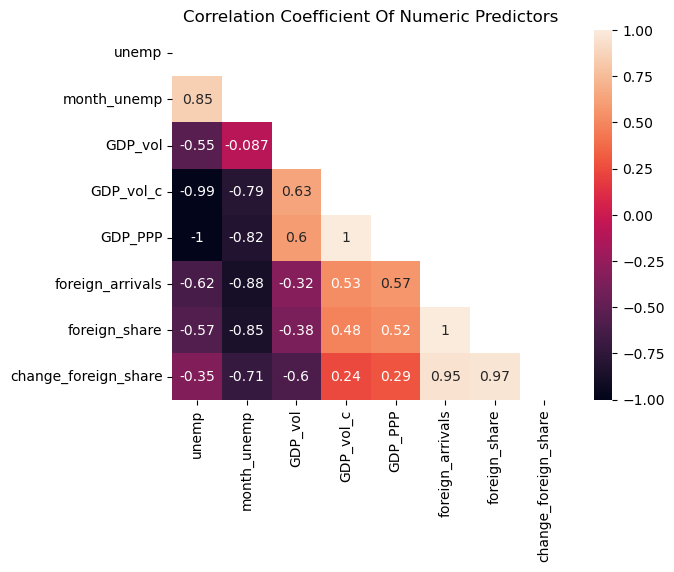

In [223]:
# correlation matrix heatmap

mask = np.triu(np.ones_like(sub_df_small_num.corr(), dtype=bool))

sns.heatmap(sub_df_small_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Numeric Predictors')
plt.show()

##### *Interpretation/Remarks*

The correlation between GDP_vol and change_foreign_share is -0.6. It is possible they might cause multicollinearity issues. Nevertheless, GDP_vol and change_foreign_share seem to pose the least likelihood of causing multicollinearity problems and are selected for the regression.

### 10.2. Descriptives
Now that the control variables are selected, descriptive statistics are found.

#### 10.2.1. GDP volume growth

In [224]:
# calculate the mean and standard deviation of "foreign_share" for each time frame
agg_GDP_vol_by_time_frame = sub_df.groupby('time_frame')['GDP_vol'].agg(['mean', 'std'])

# print the resulting DataFrame with the mean and standard deviation
print(agg_GDP_vol_by_time_frame)

                  mean       std
time_frame                      
time frame 1  1.550047  0.427696
time frame 2  1.770000  0.000000


#### 10.2.2. Foreign share

In [225]:
# calculating the mean and standard deviation of "change_foreign_share" for each time frame
agg_change_foreign_share_by_time_frame = sub_df.groupby('time_frame')['change_foreign_share'].agg(['mean', 'std'])

# print the mean and standard deviation
print(agg_change_foreign_share_by_time_frame)

                  mean       std
time_frame                      
time frame 1  0.396938  0.556004
time frame 2  1.580000  0.000000


In [346]:
sub_df.time_frame.value_counts()

time frame 1    17945
time frame 2     3712
Name: time_frame, dtype: int64

## 11. Regression

### Model 1
This model only contains the dependent variable and main explanatory variable

In [226]:
# defining the variables

y = sub_df['CLASS_bin']

X = sub_df['time_frame_1']

# adding a constant

X = sm.add_constant(X)

In [227]:
# running regression

model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.663051
         Iterations 4


In [228]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21655
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 May 2023   Pseudo R-squ.:                0.008113
Time:                        11:54:59   Log-Likelihood:                -14360.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 5.073e-53
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0086      0.033      0.263      0.793      -0.056       0.073
time_frame_1    -0.5578      0.036    -15.365      0.000      -0.629      -0.487


In [229]:
# finding odds ratios

model1_odds = pd.DataFrame(np.exp(model1.params), columns=['OR'])
model1_odds['standard error'] = model1.bse
model1_odds['z-value'] = model1.params / model1.bse  # calculate z-values
model1_odds['p-value']=model1.pvalues
model1_odds[['2.5%', '97.5%']] = np.exp(model1.conf_int())

model1_odds

,OR,standard error,z-value,p-value,2.5%,97.5%
const,1.008658,0.032827,0.262612,7.928496e-01,0.945805,1.075688
time_frame_1,0.572487,0.036301,-15.365131,2.804707e-53,0.533171,0.614702


### Model 2

This model contains the dependent variable and one control: change in foreign share

In [230]:
# defining the variables

y = sub_df['CLASS_bin']

X = sub_df['change_foreign_share']

# adding a constant

X = sm.add_constant(X)

In [231]:
# running regression

model2 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.667693
         Iterations 4


In [232]:
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21655
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 May 2023   Pseudo R-squ.:                0.001168
Time:                        11:56:20   Log-Likelihood:                -14460.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 6.063e-09
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5229      0.019    -27.717      0.000      -0.560      -0.486
change_foreign_share     0.1205      0.021      5.805      0.000       0.080       0.161


In [233]:
# finding odds ratios

model2_odds = pd.DataFrame(np.exp(model2.params), columns=['OR'])
model2_odds['z-value'] = model2.params / model2.bse  # calculate z-values
model2_odds['p-value']=model2.pvalues
model2_odds[['2.5%', '97.5%']] = np.exp(model2.conf_int())

model2_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.592818,-27.716689,4.394406e-169,0.571299,0.615147
change_foreign_share,1.128024,5.804816,6.443683e-09,1.083062,1.174853


### Model 3

This model contains the dependent variable and one control: GDP volume growth

In [234]:
# defining the variables

y = sub_df['CLASS_bin']

X = sub_df['GDP_vol']

# adding a constant

X = sm.add_constant(X)

In [235]:
# running regression

model3 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.666614
         Iterations 4


In [236]:
print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21655
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 May 2023   Pseudo R-squ.:                0.002783
Time:                        11:56:56   Log-Likelihood:                -14437.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 2.788e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9494      0.058    -16.507      0.000      -1.062      -0.837
GDP_vol        0.3135      0.035      8.981      0.000       0.245       0.382


In [237]:
# finding odds ratios

model3_odds = pd.DataFrame(np.exp(model3.params), columns=['OR'])
model3_odds['z-value'] = model3.params / model3.bse  # calculate z-values
model3_odds['p-value']=model3.pvalues
model3_odds[['2.5%', '97.5%']] = np.exp(model3.conf_int())

model3_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.386988,-16.506576,3.290307e-61,0.345734,0.433166
GDP_vol,1.368254,8.981095,2.680847e-19,1.277764,1.465152


### Model 4
This model contains the dependent variable and two controls: word_syrian and word_ukrainian

In [344]:
# defining the variables

y = sub_df['CLASS_bin']

X2 = sub_df[['word_syrian', 'word_ukrainian']]

# adding a constant

X2 = sm.add_constant(X2)

In [345]:
# running regression

model4 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.667189
         Iterations 5


In [346]:
print(model4.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21654
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001922
Time:                        11:12:54   Log-Likelihood:                -14449.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 8.215e-13
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4367      0.014    -30.680      0.000      -0.465      -0.409
word_syrian        0.2083      0.106      1.963      0.050       0.000       0.416
word_ukrainian    -0.6444      0.093

In [347]:
# finding odds ratios

model4_odds = pd.DataFrame(np.exp(model4.params), columns=['OR'])
model4_odds['z-value'] = model4.params / model4.bse  # calculate z-values
model4_odds['p-value']=model4.pvalues
model4_odds[['2.5%', '97.5%']] = np.exp(model4.conf_int())

model4_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.646161,-30.679612,1.064784e-206,0.628383,0.664442
word_syrian,1.231629,1.963099,4.963466e-02,1.000333,1.516407
word_ukrainian,0.524974,-6.911924,4.781231e-12,0.437300,0.630226


### Model 5
This model contains the dependent variable, main explanatory variable, and one control: change in foreign share of population

In [348]:
# defining the variables

y = sub_df['CLASS_bin']

X2 = sub_df[['time_frame_1', 'change_foreign_share']]

# adding a constant

X2 = sm.add_constant(X2)

In [349]:
# running regression

model5 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.662232
         Iterations 4


In [350]:
print(model5.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21654
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.009337
Time:                        11:13:36   Log-Likelihood:                -14342.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 1.971e-59
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2696      0.055      4.928      0.000       0.162       0.377
time_frame_1            -0.7543      0.049    -15.347      0.000      -0.851      -0.658
change_forei

In [351]:
# finding odds ratios

model5_odds = pd.DataFrame(np.exp(model5.params), columns=['OR'])
model5_odds['z-value'] = model5.params / model5.bse  # calculate z-values
model5_odds['p-value']=model5.pvalues
model5_odds[['2.5%', '97.5%']] = np.exp(model5.conf_int())

model5_odds

,OR,z-value,p-value,2.5%,97.5%
const,1.309438,4.928476,8.287352e-07,1.176311,1.457630
time_frame_1,0.470352,-15.346814,3.720138e-53,0.427157,0.517915
change_foreign_share,0.847745,-5.964184,2.458601e-09,0.802956,0.895033


### Model 6
This model contains the dependent variable, main explanatory variable, and one control: GDP volume growth

In [376]:
# defining the variables

y = sub_df['CLASS_bin']

X2 = sub_df[['time_frame_1', 'GDP_vol']]

# adding a constant

X2 = sm.add_constant(X2)

In [377]:
# running regression

model6 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.662232
         Iterations 4


In [378]:
print(model6.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21654
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.009337
Time:                        11:54:30   Log-Likelihood:                -14342.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 1.971e-59
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3714      0.072     -5.182      0.000      -0.512      -0.231
time_frame_1    -0.5116      0.037    -13.796      0.000      -0.584      -0.439
GDP_vol          0.2147      0.036      5.96

In [379]:
# finding odds ratios

model6_odds = pd.DataFrame(np.exp(model6.params), columns=['OR'])
model6_odds['z-value'] = model6.params / model6.bse  # calculate z-values
model6_odds['p-value']=model6.pvalues
model6_odds[['2.5%', '97.5%']] = np.exp(model6.conf_int())

model6_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.689735,-5.181786,2.197714e-07,0.599329,0.793778
time_frame_1,0.599517,-13.796055,2.691858e-43,0.557486,0.644716
GDP_vol,1.239525,5.964184,2.458601e-09,1.155073,1.330151


### Model X
This model contains the dependent variable, main explanatory variable, and the following controls: GPD_vol & change_foreign_share

In [356]:
# defining the variables

y = sub_df['CLASS_bin']

X2 = sub_df[['time_frame_1', 'GDP_vol', 'change_foreign_share']]

# adding a constant

X2 = sm.add_constant(X2)

In [357]:
# running regression

modelx = sm.Logit(y, X2).fit()

         Current function value: 0.662232
         Iterations: 35


/Users/andycass/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model 7
This models contains the dependent variable, main explanatory, and the following controls: word_syrian & word_ukrainian

In [364]:
# defining the variables

y = sub_df['CLASS_bin']

X2 = sub_df[['time_frame_1', 'word_syrian', 'word_ukrainian']]

# adding a constant

X2 = sm.add_constant(X2)

In [365]:
# running regression

model7 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.658596
         Iterations 5


In [366]:
print(model7.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21653
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.01478
Time:                        11:19:20   Log-Likelihood:                -14263.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 2.043e-92
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2039      0.036      5.634      0.000       0.133       0.275
time_frame_1      -0.7566      0.039    -19.236      0.000      -0.834      -0.680
word_syrian        0.2135      0.107

In [367]:
# finding odds ratios

model7_odds = pd.DataFrame(np.exp(model7.params), columns=['OR'])
model7_odds['z-value'] = model7.params / model7.bse  # calculate z-values
model7_odds['p-value']=model7.pvalues
model7_odds[['2.5%', '97.5%']] = np.exp(model7.conf_int())

model7_odds

,OR,z-value,p-value,2.5%,97.5%
const,1.226172,5.633578,1.765089e-08,1.142204,1.316313
time_frame_1,0.469257,-19.235830,1.855503e-82,0.434441,0.506864
word_syrian,1.238049,1.995106,4.603133e-02,1.003768,1.527011
word_ukrainian,0.277150,-12.964136,1.954190e-38,0.228278,0.336487


### Model 8
This models contains the dependent variable, main explanatory, and the following controls: GDP_vol, word_syrian, & word_ukrainian

In [380]:
# defining the variables

y = sub_df['CLASS_bin']

X2 = sub_df[['time_frame_1', 'change_foreign_share', 'word_syrian', 'word_ukrainian']]

# adding a constant

X2 = sm.add_constant(X2)

In [381]:
# running regression

model8 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.657764
         Iterations 5


In [382]:
print(model8.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21652
Method:                           MLE   Df Model:                            4
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.01602
Time:                        12:11:34   Log-Likelihood:                -14245.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 4.317e-99
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4670      0.057      8.225      0.000       0.356       0.578
time_frame_1            -0.9549      0.051    -18.562      0.000      -1.056      -0.854
change_forei

In [383]:
# finding odds ratios

model8_odds = pd.DataFrame(np.exp(model8.params), columns=['OR'])
model8_odds['z-value'] = model8.params / model8.bse  # calculate z-values
model8_odds['p-value']=model8.pvalues
model8_odds[['2.5%', '97.5%']] = np.exp(model8.conf_int())

model8_odds

,OR,z-value,p-value,2.5%,97.5%
const,1.595135,8.224643,1.957732e-16,1.427151,1.782891
time_frame_1,0.384867,-18.561599,6.571931e-77,0.347955,0.425696
change_foreign_share,0.846541,-6.013544,1.815110e-09,0.801801,0.893777
word_syrian,1.253933,2.111604,3.472044e-02,1.016383,1.547003
word_ukrainian,0.277015,-12.969501,1.822121e-38,0.228167,0.336320


### Model 9
This models contains the dependent variable, main explanatory, and the following controls: change_foreign_share, word_syrian, & word_ukrainian

In [384]:
# defining the variables

y = sub_df['CLASS_bin']

X2 = sub_df[['time_frame_1', 'GDP_vol', 'word_syrian', 'word_ukrainian']]

# adding a constant

X2 = sm.add_constant(X2)

In [385]:
# running regression

model9 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.657764
         Iterations 5


In [386]:
print(model9.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                21657
Model:                          Logit   Df Residuals:                    21652
Method:                           MLE   Df Model:                            4
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.01602
Time:                        12:11:42   Log-Likelihood:                -14245.
converged:                       True   LL-Null:                       -14477.
Covariance Type:            nonrobust   LLR p-value:                 4.317e-99
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1796      0.073     -2.449      0.014      -0.323      -0.036
time_frame_1      -0.7101      0.040    -17.728      0.000      -0.789      -0.632
GDP_vol            0.2166      0.036

In [387]:
# finding odds ratios

model9_odds = pd.DataFrame(np.exp(model9.params), columns=['OR'])
model9_odds['z-value'] = model9.params / model9.bse  # calculate z-values
model9_odds['p-value']=model9.pvalues
model9_odds[['2.5%', '97.5%']] = np.exp(model9.conf_int())

model9_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.835600,-2.449325,1.431241e-02,0.723738,0.964752
time_frame_1,0.491583,-17.728001,2.549366e-70,0.454465,0.531732
GDP_vol,1.241818,6.013544,1.815110e-09,1.157183,1.332643
word_syrian,1.253933,2.111604,3.472044e-02,1.016383,1.547003
word_ukrainian,0.277015,-12.969501,1.822121e-38,0.228167,0.336320


## 12. Additional Models
In addition to the 9 main models, 4 models will be added. 2 models will be created for the sub-dataset of Time Frame 1 and 2 models for the sub-dataset of Time Frame 2.

In [395]:
# re-establishing time frame datasets (for regression)

sub_df_t1 = sub_df[sub_df.time_frame=='time frame 1'].copy()
sub_df_t2 = sub_df[sub_df.time_frame=='time frame 2'].copy()

In [396]:
sub_df_t1

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share,change_foreign_share,time_frame_1,time_frame_2
0,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
1,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
2,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
3,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
4,@hataibu @wendeiki Aber Hauptsache es kommen k...,2.715332e+09,2016-04-20 15:22:12+00:00,de,8abc99434d4f5d28,0.0,0.0,1.0,0.0,0.0,...,0.061,0.040,2.14,7589.867232,48093.447103,1719075,2.08,-0.37,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17940,NEW POST: Berlin Refugees is an Awesome Founda...,1.709100e+07,2015-08-21 12:33:15+00:00,en,3078869807f9dd36,0.0,0.0,2.0,0.0,0.0,...,0.064,0.041,1.24,7354.569875,47281.997550,2016241,2.45,0.80,1,0
17941,#CelioGermanyDesk Germany 'can't cope' with 80...,2.717762e+08,2015-08-21 11:22:33+00:00,en,b7d3c12268abd20e,0.0,0.0,0.0,0.0,0.0,...,0.064,0.041,1.24,7354.569875,47281.997550,2016241,2.45,0.80,1,0
17942,Migrant is a word that strips suffering people...,2.793092e+08,2015-08-21 08:53:08+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,0.064,0.041,1.24,7354.569875,47281.997550,2016241,2.45,0.80,1,0
17943,"Food, no money: GER has been trying for 35 y t...",5.195073e+08,2015-08-21 06:48:21+00:00,en,3078869807f9dd36,1.0,0.0,0.0,0.0,0.0,...,0.064,0.041,1.24,7354.569875,47281.997550,2016241,2.45,0.80,1,0


In [397]:
sub_df_t2

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share,change_foreign_share,time_frame_1,time_frame_2
17945,"@MalteKaufmann Oh wow..Ja, schlimme Zustände w...",1.498603e+18,2022-10-23 22:37:51+00:00,de,d16987286d474768,0.0,0.0,1.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
17946,"@HasnainKazim Ach, es ist ja so einfach mit de...",1.310100e+18,2022-10-23 18:59:22+00:00,de,6bb848727434a41b,0.0,0.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
17947,Unsere Politiker sind allmählich komplett verr...,1.272455e+09,2022-10-23 15:58:18+00:00,de,0851007f4d4c6fc5,0.0,2.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
17948,@vonDaeniken Modernisieren Sie doch mal so ein...,8.649224e+07,2022-10-23 15:43:16+00:00,de,635f1913f4099961,0.0,0.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
17949,Das sollte auch laut gesagt werden und die Unt...,1.534419e+18,2022-10-23 14:49:17+00:00,de,5b146bf0b819f1af,0.0,0.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21652,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
21653,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
21654,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
21655,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1


In [398]:
# resetting index

sub_df_t2 = sub_df_t2.reset_index(drop=True)

In [399]:
sub_df_t2

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,unemp,month_unemp,GDP_vol,GDP_vol_c,GDP_PPP,foreign_arrivals,foreign_share,change_foreign_share,time_frame_1,time_frame_2
0,"@MalteKaufmann Oh wow..Ja, schlimme Zustände w...",1.498603e+18,2022-10-23 22:37:51+00:00,de,d16987286d474768,0.0,0.0,1.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
1,"@HasnainKazim Ach, es ist ja so einfach mit de...",1.310100e+18,2022-10-23 18:59:22+00:00,de,6bb848727434a41b,0.0,0.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
2,Unsere Politiker sind allmählich komplett verr...,1.272455e+09,2022-10-23 15:58:18+00:00,de,0851007f4d4c6fc5,0.0,2.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
3,@vonDaeniken Modernisieren Sie doch mal so ein...,8.649224e+07,2022-10-23 15:43:16+00:00,de,635f1913f4099961,0.0,0.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
4,Das sollte auch laut gesagt werden und die Unt...,1.534419e+18,2022-10-23 14:49:17+00:00,de,5b146bf0b819f1af,0.0,0.0,0.0,0.0,0.0,...,0.054,0.029,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,@UkraineLive2022 Ewelcome to EU 💚.Looks like P...,3.165588e+09,2022-02-26 06:37:36+00:00,en,5bcd72da50f0ee77,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
3708,"@ukhomeoffice Disgraceful when Poland, Slovaki...",3.014727e+08,2022-02-26 04:20:59+00:00,en,5105bbdcca441271,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
3709,Israeli NGOs send aid to refugees pouring out ...,1.161167e+08,2022-02-25 21:20:48+00:00,en,539b05c6d7018f19,0.0,0.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1
3710,On the other side (literally)... local people ...,3.825134e+07,2022-02-25 16:37:41+00:00,en,44f220aa2901072d,0.0,1.0,0.0,0.0,0.0,...,0.054,0.032,1.77,7956.918664,49578.335992,2487360,2.95,1.58,0,1


In [400]:
print(17945+3712)

21657


### 12.1. Time Frame 1
The following models use data from Time Frame 1.
#### Model 1
This model includes the dependent variable and the change_foreign_share.

In [465]:
# defining the variables

y = sub_df_t1['CLASS_bin']

X = sub_df_t1['change_foreign_share']

# adding a constant

X = sm.add_constant(X)

In [466]:
# running regression

model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.655840
         Iterations 4


In [467]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                17945
Model:                          Logit   Df Residuals:                    17943
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001503
Time:                        15:30:52   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -11787.
Covariance Type:            nonrobust   LLR p-value:                 2.630e-09
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4847      0.019    -25.774      0.000      -0.522      -0.448
change_foreign_share    -0.1652      0.028     -5.964      0.000      -0.219      -0.111


In [468]:
# finding odds ratios

model1_odds = pd.DataFrame(np.exp(model1.params), columns=['OR'])
model1_odds['standard error'] = model1.bse
model1_odds['z-value'] = model1.params / model1.bse  # calculate z-values
model1_odds['p-value']=model1.pvalues
model1_odds[['2.5%', '97.5%']] = np.exp(model1.conf_int())

model1_odds

,OR,standard error,z-value,p-value,2.5%,97.5%
const,0.615897,0.018805,-25.773820,1.743479e-146,0.593610,0.639020
change_foreign_share,0.847745,0.027695,-5.964184,2.458601e-09,0.802956,0.895033


#### Model 2

In [470]:
# defining the variables

y = sub_df_t1['CLASS_bin']

X = sub_df_t1['GDP_vol']

# adding a constant

X = sm.add_constant(X)

In [471]:
# running regression

model2 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.655840
         Iterations 4


In [472]:
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                17945
Model:                          Logit   Df Residuals:                    17943
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001503
Time:                        15:32:10   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -11787.
Covariance Type:            nonrobust   LLR p-value:                 2.630e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8831      0.058    -15.155      0.000      -0.997      -0.769
GDP_vol        0.2147      0.036      5.964      0.000       0.144       0.285


#### Model 3

In [473]:
# defining the variables

y = sub_df_t1['CLASS_bin']

X = sub_df_t1[['word_syrian', 'word_ukrainian']]

# adding a constant

X = sm.add_constant(X)

In [474]:
# running regression

model3 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.656804
         Iterations 4


In [475]:
print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                17945
Model:                          Logit   Df Residuals:                    17942
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 May 2023   Pseudo R-squ.:               3.481e-05
Time:                        15:32:52   Log-Likelihood:                -11786.
converged:                       True   LL-Null:                       -11787.
Covariance Type:            nonrobust   LLR p-value:                    0.6634
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5509      0.016    -35.239      0.000      -0.582      -0.520
word_syrian        0.0981      0.119      0.823      0.411      -0.136       0.332
word_ukrainian     0.5509      1.414

In [476]:
# finding odds ratios

model3_odds = pd.DataFrame(np.exp(model3.params), columns=['OR'])
model3_odds['standard error'] = model3.bse
model3_odds['z-value'] = model3.params / model3.bse  # calculate z-values
model3_odds['p-value']=model3.pvalues
model3_odds[['2.5%', '97.5%']] = np.exp(model3.conf_int())

model3_odds

,OR,standard error,z-value,p-value,2.5%,97.5%
const,0.576445,0.015632,-35.239270,5.009326e-272,0.559051,0.594380
word_syrian,1.103087,0.119273,0.822588,4.107425e-01,0.873140,1.393592
word_ukrainian,1.734770,1.414300,0.389503,6.969038e-01,0.108489,27.739342


#### Model 4

In [480]:
# defining the variables

y = sub_df_t1['CLASS_bin']

X = sub_df_t1[['change_foreign_share', 'word_syrian', 'word_ukrainian']]

# adding a constant

X = sm.add_constant(X)

In [481]:
# running regression

model4 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.655812
         Iterations 4


In [482]:
print(model4.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                17945
Model:                          Logit   Df Residuals:                    17941
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001545
Time:                        15:34:29   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -11787.
Covariance Type:            nonrobust   LLR p-value:                 6.097e-08
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4865      0.019    -25.745      0.000      -0.524      -0.449
change_foreign_share    -0.1656      0.028     -5.978      0.000      -0.220      -0.111
word_syrian 

In [483]:
# finding odds ratios

model4_odds = pd.DataFrame(np.exp(model4.params), columns=['OR'])
model4_odds['standard error'] = model4.bse
model4_odds['z-value'] = model4.params / model4.bse  # calculate z-values
model4_odds['p-value']=model4.pvalues
model4_odds[['2.5%', '97.5%']] = np.exp(model4.conf_int())

model4_odds

,OR,standard error,z-value,p-value,2.5%,97.5%
const,0.614787,0.018896,-25.744814,3.684668e-146,0.592434,0.637983
change_foreign_share,0.847375,0.027705,-5.977703,2.263059e-09,0.802589,0.894661
word_syrian,1.119956,0.119409,0.948758,3.427436e-01,0.886258,1.415278
word_ukrainian,1.529902,1.414454,0.300613,7.637094e-01,0.095649,24.470832


#### Model 5
This models contains the dependent variable and GDP_vol

In [484]:
# defining the variables

y = sub_df_t1['CLASS_bin']

X = sub_df_t1[['GDP_vol', 'word_syrian', 'word_ukrainian']]

# adding a constant

X = sm.add_constant(X)

In [485]:
# running regression

model5 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.655812
         Iterations 4


In [486]:
print(model5.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                17945
Model:                          Logit   Df Residuals:                    17941
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 May 2023   Pseudo R-squ.:                0.001545
Time:                        15:35:12   Log-Likelihood:                -11769.
converged:                       True   LL-Null:                       -11787.
Covariance Type:            nonrobust   LLR p-value:                 6.097e-08
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8859      0.058    -15.178      0.000      -1.000      -0.772
GDP_vol            0.2153      0.036      5.978      0.000       0.145       0.286
word_syrian        0.1133      0.119

In [487]:
# finding odds ratios

model5_odds = pd.DataFrame(np.exp(model5.params), columns=['OR'])
model5_odds['z-value'] = model5.params / model5.bse  # calculate z-values
model5_odds['p-value']=model5.pvalues
model5_odds[['2.5%', '97.5%']] = np.exp(model5.conf_int())

model5_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.412329,-15.178410,4.915550e-52,0.367757,0.462303
GDP_vol,1.240228,5.977703,2.263059e-09,1.155698,1.330940
word_syrian,1.119956,0.948758,3.427436e-01,0.886258,1.415278
word_ukrainian,1.529902,0.300613,7.637094e-01,0.095649,24.470832


#### Model X

In [434]:
# defining the variables

y = sub_df_t1['CLASS_bin']

X = sub_df_t1[['change_foreign_share', 'GDP_vol', 'word_syrian', 'word_ukrainian']]

# adding a constant

X = sm.add_constant(X)

In [435]:
# running regression

modelx = sm.Logit(y, X).fit()

         Current function value: 0.655812
         Iterations: 35


/Users/andycass/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 12.2. Time Frame 2
#### Model 1

Due to the fact that observations in Time Frame 2 can only take one value for change_foreign_share, the variable change_foreign_share cannot be included in the regression. The same is the case for GDP_vol.

In [494]:
# defining the variables

y = sub_df_t2['CLASS_bin']

X = sub_df_t2[['word_syrian', 'word_ukrainian']]

# adding a constant

X = sm.add_constant(X)

In [495]:
# running regression

model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.666325
         Iterations 5


In [496]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                 3712
Model:                          Logit   Df Residuals:                     3709
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 May 2023   Pseudo R-squ.:                 0.03868
Time:                        15:39:08   Log-Likelihood:                -2473.4
converged:                       True   LL-Null:                       -2572.9
Covariance Type:            nonrobust   LLR p-value:                 5.966e-44
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1967      0.036      5.408      0.000       0.125       0.268
word_syrian        0.7671      0.267      2.875      0.004       0.244       1.290
word_ukrainian    -1.3004      0.100

In [497]:
# finding odds ratios

model1_odds = pd.DataFrame(np.exp(model1.params), columns=['OR'])
model1_odds['z-value'] = model1.params / model1.bse  # calculate z-values
model1_odds['p-value']=model1.pvalues
model1_odds[['2.5%', '97.5%']] = np.exp(model1.conf_int())

model1_odds

,OR,z-value,p-value,2.5%,97.5%
const,1.217334,5.407565,6.388726e-08,1.133583,1.307274
word_syrian,2.153499,2.874639,4.044892e-03,1.276446,3.633178
word_ukrainian,0.272411,-13.061736,5.447145e-39,0.224119,0.331109
